In [1]:
using Revise
using PyPlot
using StaticArrays, SchwarzChristoffelDisk

[ Info: Precompiling SchwarzChristoffelDisk [e6814d44-013b-435f-9487-308d62823705] (cache misses: include_dependency fsize change (2), mismatched flags (18))

SYSTEM: caught exception of type :MethodError while trying to print a failed Task notice; giving up


In [2]:
classify_symmetry(p::Polygon) = SchwarzChristoffelDisk.classify_symmetry(p.w, p.β, p.ℓ)

ϕ = acos(1/sqrt(5))/π
κ = sqrt(5)
;

In [3]:
circshift_poly(p::Polygon{N}, k) where {N} = Polygon(
    SVector{N}(ntuple(i -> p.w[mod1(i - k, N)], N)),
    PolygonSymmetry(p.s.symmetry, mod1(p.s.first_independent_vertex + k, N)),
    SVector{N}(ntuple(i -> p.β[mod1(i - k, N)], N)),
    SVector{N}(ntuple(i -> p.ℓ[mod1(i - k, N)], N)),
)

circshift_poly (generic function with 1 method)

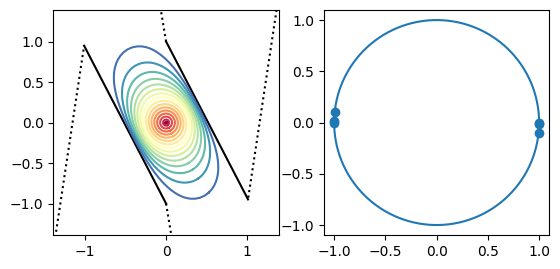

In [4]:
function scderiv_free(x, s, β, kN, wN)
    pre = SchwarzChristoffelDisk.prevertices(x, s, 0)
    f = SchwarzChristoffel(pre, β)
    SchwarzChristoffelDisk.sc_fix!(f, pre, kN, wN)
    f
end

sc_plot(scderiv_free(MVector{2}(3.5, 2), CyclicSymmetry{2}(), SA[-0.1, 1.9, -0.8, -0.1, 1.9, -0.8], 1, 1im), 15, 500)

# Remaining error cases

poly.β = [0.24999999999999997, 0.55, -1.0, 0.7, 0.24999999999999997, 0.55, -1.0, 0.7, 0.24999999999999997, 0.55, -1.0, 0.7, 0.24999999999999997, 0.55, -1.0, 0.7]
idxs = SchwarzChristoffelDisk.ProblemIndices{1, 1}(0, 2, [3], [3])


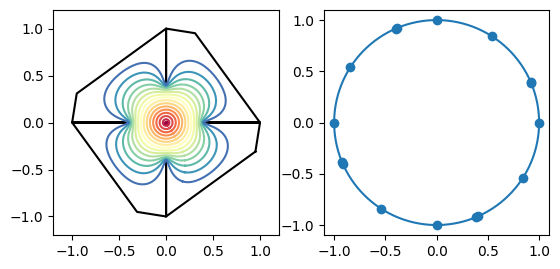

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0]
 * Zero: [2.9920810324920635, -3.3990999029395383, 0.03535583177447236]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [ ]:
# This one failed with circshift 0 because β[num_independent_vertices-1] == -1
poly = Polygon(SA[cispi(-0.1), 1, 0.4, 1], CyclicSymmetry{4}())
poly = circshift_poly(poly, 0)
@show poly.β
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

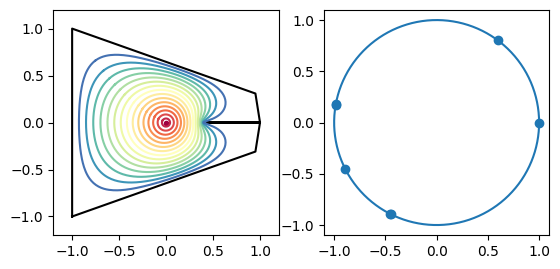

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0]
 * Zero: [3.874813175586069, -5.0379133392637305, 0.7793027669175002]
 * Inf-norm of residuals: 0.000000
 * Iterations: 8
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 9
 * Jacobian Calls (df/dx): 9

In [ ]:
# Does not fail
poly = Polygon(SA[-1-1im, cispi(-0.1), 1, 0.4], BilateralSymmetry{1}(1))
poly = circshift_poly(poly, 0)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 3}(0, 2, [3], [3, 4, 5])


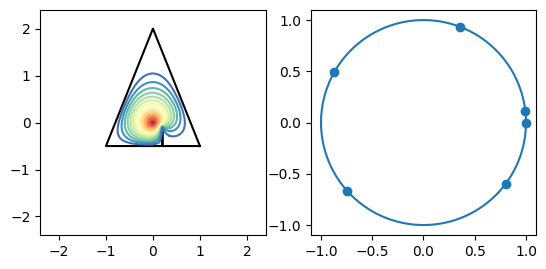

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0, 0.0]
 * Zero: [-2.254671659299347, -0.27170362126578773, 0.14029820376338487, -0.3576763541406374, 1.0173991944435814]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [21]:
# This one fails because β[N-1] == -1
poly = Polygon(SA[0.2-0.5im, 1-0.5im, 2im, -1-0.5im, 0.2-0.5im, 0.2-0.1im])
poly = circshift_poly(poly, 5)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

poly.s.first_independent_vertex = 10
idxs = SchwarzChristoffelDisk.ProblemIndices{1, 1}(10, 11, [1], [1])


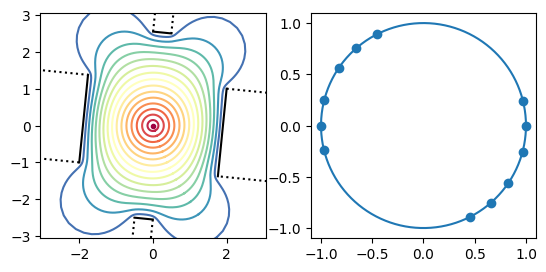

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0]
 * Zero: [0.2921955876086291, 0.07788707783145335, -2.0305851166139206]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [22]:
poly = Polygon(
                    SA[2+1im, Inf, 0.5+2.5im],
                    DihedralSymmetry{2,0}(0.1+1im),
                    Dict(1 => -0.5, 3 => -0.5),
                )
@show poly.s.first_independent_vertex
poly = circshift_poly(poly, 1)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

poly.β = [0.5, 0.6211189415908435, 0.7577621168183132, 0.6211189415908435, 0.5, -1.0]
poly.s = PolygonSymmetry{BilateralSymmetry{2, ComplexF64}}(BilateralSymmetry{2, ComplexF64}(-0.0 - 0.1im), 6)
idxs = SchwarzChristoffelDisk.ProblemIndices{0, 2}(5, 6, Int64[], [6, 1])


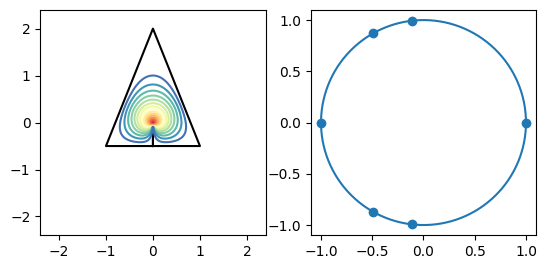

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0]
 * Zero: [1.4351081678073552, -0.9744922231018973]
 * Inf-norm of residuals: 0.000000
 * Iterations: 7
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 8
 * Jacobian Calls (df/dx): 7

In [27]:
δ = 0
poly = Polygon(SA[δ-0.5im, 1-0.5im, 2im, -1-0.5im, -δ-0.5im, -0.1im])
# poly = remove_symmetry(poly)
poly = circshift_poly(poly, 0)
@show poly.β
@show poly.s
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

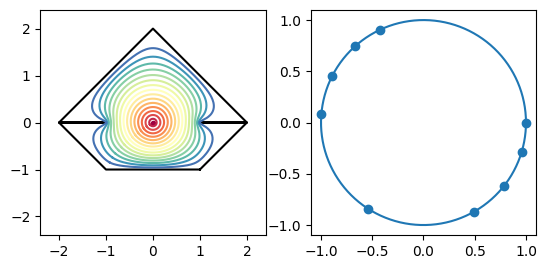

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0]
 * Zero: [1.0148743314535156, 0.056535645185869086, 0.23110683193798912, -1.9200623653325521]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [404]:
poly = Polygon(SA[1-1im, 2, 1, 2, 2im], BilateralSymmetry{1}(1im))
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

┌ Warning: Re-attempting parameter problem with random starting point
└ @ SchwarzChristoffelDisk c:\Scratch\SchwarzChristoffelDisk.jl\src\parameter_problem.jl:239


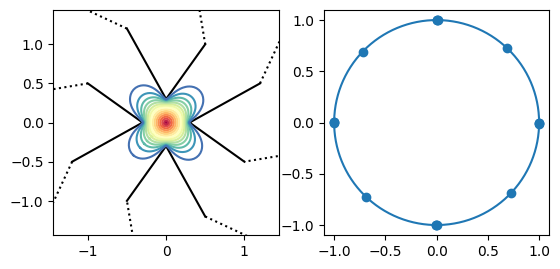

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.35330695560177217, -0.7002193916132172, -0.5429471975642314]
 * Zero: [0.07170153660678068, 4.8983050566768975, 0.2677392753553644]
 * Inf-norm of residuals: 0.000000
 * Iterations: 10
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 11
 * Jacobian Calls (df/dx): 10

In [55]:
poly = Polygon(
                SA[1-0.5im, 0.3, 1.2+0.5im, Inf],
                CyclicSymmetry{4}(),
                Dict(1 => -0.25, 3 => 0.2),
            )
poly = circshift_poly(poly, 3)
res, scderiv = sc_parameter_problem(poly; retries = 1)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

┌ Warning: Re-attempting parameter problem with random starting point
└ @ SchwarzChristoffelDisk c:\Scratch\SchwarzChristoffelDisk.jl\src\parameter_problem.jl:239


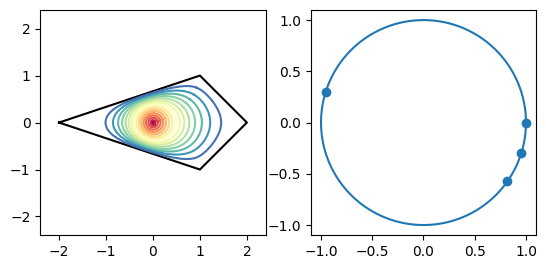

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.462952647539593]
 * Zero: [2.2250482392717945]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [56]:
poly = Polygon(SA[2, 1+1im, -2, 1-1im])
poly = circshift_poly(poly, 2)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{0, 4}(1, 2, Int64[], [2, 3, 4, 5])
idxs = SchwarzChristoffelDisk.ProblemIndices{0, 4}(1, 2, Int64[], [2, 3, 4, 5])
idxs = SchwarzChristoffelDisk.ProblemIndices{0, 4}(1, 2, Int64[], [2, 3, 4, 5])


┌ Warning: Re-attempting parameter problem with random starting point
└ @ SchwarzChristoffelDisk c:\Scratch\SchwarzChristoffelDisk.jl\src\parameter_problem.jl:246
┌ Warning: Re-attempting parameter problem with random starting point
└ @ SchwarzChristoffelDisk c:\Scratch\SchwarzChristoffelDisk.jl\src\parameter_problem.jl:246


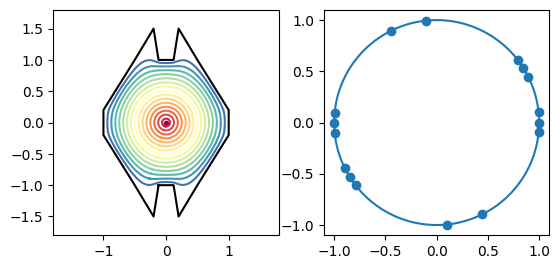

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [-0.12423862153748981, 0.7079130196473963, 1.2123594159470812, -0.4326770346876307]
 * Zero: [1.2169075442372876, 0.10879522075381552, -2.378093746713227, 1.030661801598528]
 * Inf-norm of residuals: 0.000000
 * Iterations: 8
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 9
 * Jacobian Calls (df/dx): 9

In [285]:
poly = Polygon(SA[1+0.2im, 0.5+1im, 0.2+1.5im, 0.12+1im],
               DihedralSymmetry{2,0}(1im))
poly = circshift_poly(poly, 5)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

In [278]:
poly = Polygon(SA[1+0.2im, 0.31+1im, 0.3+1.5im, 0.1+1im],
               DihedralSymmetry{2,0}(1im))
poly = circshift_poly(poly, 5)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{0, 4}(1, 2, Int64[], [2, 3, 4, 5])


LoadError: parameter_problem failed

idxs = SchwarzChristoffelDisk.ProblemIndices{0, 4}(1, 2, Int64[], [2, 3, 4, 5])


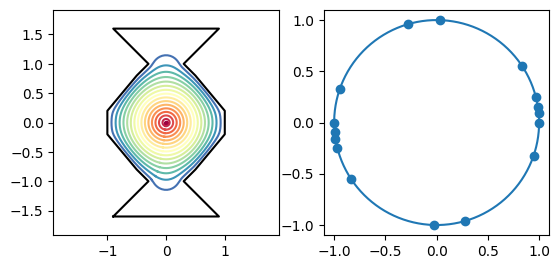

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0]
 * Zero: [-0.35228983186611457, -1.2782833923380883, -1.0688996530395507, 1.1369703234604298]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [276]:
poly = Polygon(SA[1+0.2im, 0.5+0.8im, 0.3+1im, 0.9+1.6im],
               DihedralSymmetry{2,0}(1im))
# fails with 5, 6, 13, 14
# Weird, because that is pretty much the same polygon except now the other symmetric part is in focus
poly = circshift_poly(poly, 5)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

┌ Warning: Re-attempting parameter problem with random starting point
└ @ SchwarzChristoffelDisk c:\Scratch\SchwarzChristoffelDisk.jl\src\parameter_problem.jl:246


idxs = SchwarzChristoffelDisk.ProblemIndices{0, 4}(3, 4, Int64[], [4, 5, 6, 7])
idxs = SchwarzChristoffelDisk.ProblemIndices{0, 4}(3, 4, Int64[], [4, 5, 6, 7])


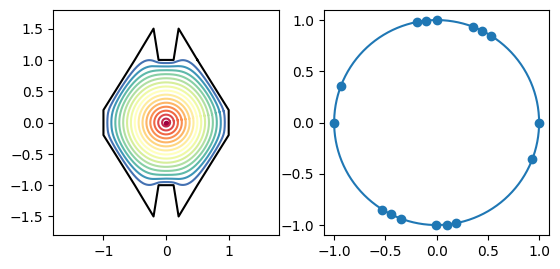

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [-0.759001919806064, -0.9733726257755639, -0.8570307908301052, -0.6689419443083632]
 * Zero: [1.2169075443079793, 0.10879522075584834, -2.378093746705481, 1.030661801603511]
 * Inf-norm of residuals: 0.000000
 * Iterations: 7
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 8
 * Jacobian Calls (df/dx): 8

In [275]:
poly = Polygon(SA[0.5 + 1.0im, 0.2 + 1.5im, 0.12 + 1.0im, -0.12 + 1.0im, -0.2 + 1.5im, -0.5 + 1.0im, -1.0 + 0.2im, -1.0 - 0.2im, -0.5 - 1.0im, -0.2 - 1.5im, -0.12 - 1.0im, 0.12 - 1.0im, 0.2 - 1.5im, 0.5 - 1.0im, 1.0 - 0.2im, 1.0 + 0.2im], SchwarzChristoffelDisk.DihedralSymmetry{2, 0}(0 + 1im), SA[-0.0057868148667220825, 0.7774775919283564, -0.4494984615509871, -0.4494984615509871, 0.7774775919283564, -0.0057868148667220825, 0.17780768448935272, 0.17780768448935272, -0.0057868148667220825, 0.7774775919283564, -0.4494984615509871, -0.4494984615509871, 0.7774775919283564, -0.0057868148667220825, 0.17780768448935272, 0.17780768448935272], SA[0.5830951894845301, 0.5063595560468865, 0.24, 0.5063595560468865, 0.5830951894845301, 0.9433981132056605, 0.4, 0.9433981132056605, 0.5830951894845301, 0.5063595560468865, 0.24, 0.5063595560468865, 0.5830951894845301, 0.9433981132056605, 0.4, 0.9433981132056605])
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 2}(0, 1, [4], [1, 4])


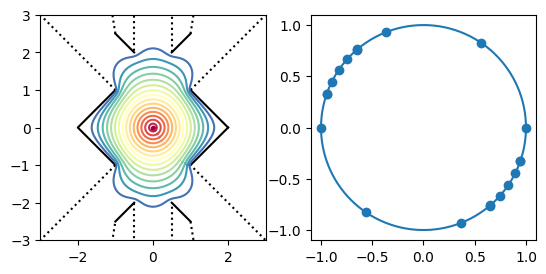

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0]
 * Zero: [1.0834128678328951, 3.640705427848035, -2.6910249357165235, -0.05919475722817674]
 * Inf-norm of residuals: 0.000000
 * Iterations: 8
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 9
 * Jacobian Calls (df/dx): 8

In [274]:
poly = Polygon(SA[2, 1+1im, Inf, 1+2.5im, 0.5+2im, Inf],
        DihedralSymmetry{2,2}(1im),
                    Dict(
                        2 => -0.5,
                        3 => 1.2,
                        4 => -0.2,
                        5 => -0.75,
                        6 => 1,
                        7 => -0.75,
                    ),
                )
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

In [349]:
poly = Polygon(
    SA[2.0 + 0.0im, 1.5 + 1.0im, Inf + NaN*im, 0.5 + 2.5im, 0.2 + 2.0im, Inf + NaN*im, -0.2 + 2.0im, -0.5 + 2.5im, Inf + NaN*im, -1.5 + 1.0im, -2.0 + 0.0im, -1.5 - 1.0im, -Inf + NaN*im, -0.5 - 2.5im, -0.2 - 2.0im, -Inf + NaN*im, 0.2 - 2.0im, 0.5 - 2.5im, -Inf + NaN*im, 1.5 - 1.0im],
    DihedralSymmetry{2, 2}(1im),
    SA[0.2951672353008665, -0.5, 1.0173595508115136, 0.1, -0.9, 1.270113663, -0.9, 0.1, 1.0173595508115136, -0.5, 0.2951672353008665, -0.5, 1.0173595508115136, 0.1, -0.9, 1.270113663, -0.9, 0.1, 1.0173595508115136, -0.5],
    SA[1.118033988749895, Inf, Inf, 0.5830951894845301, Inf, Inf, 0.5830951894845301, Inf, Inf, 1.118033988749895, 1.118033988749895, Inf, Inf, 0.5830951894845301, Inf, Inf, 0.5830951894845301, Inf, Inf, 1.118033988749895])
poly = circshift_poly(poly, 1)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

LoadError: MethodError: no method matching Polygon(::SVector{20, ComplexF64}, ::DihedralSymmetry{2, 2, Complex{Int64}}, ::SVector{20, Float64}, ::SVector{20, Float64})
The type `Polygon` exists, but no method is defined for this combination of argument types when trying to construct it.

[0mClosest candidates are:
[0m  Polygon(::StaticArray{Tuple{N}, T, 1} where T, [91m::PolygonSymmetry{S}[39m, ::StaticArray{Tuple{N}, T, 1} where T, ::StaticArray{Tuple{N}, T, 1} where T) where {N, S}
[0m[90m   @[39m [36mSchwarzChristoffelDisk[39m [90mc:\Scratch\SchwarzChristoffelDisk.jl\src\[39m[90m[4mpolygon.jl:11[24m[39m
[0m  Polygon(::SVector{B, W}, ::DihedralSymmetry{R, P}, [91m::Dict{Int64, <:Number}[39m) where {B, W, R, P}
[0m[90m   @[39m [36mSchwarzChristoffelDisk[39m [90mc:\Scratch\SchwarzChristoffelDisk.jl\src\[39m[90m[4mpolygon.jl:155[24m[39m
[0m  Polygon(::SVector{B, W}, ::DihedralSymmetry{R, P}) where {B, W, R, P}
[0m[90m   @[39m [36mSchwarzChristoffelDisk[39m [90mc:\Scratch\SchwarzChristoffelDisk.jl\src\[39m[90m[4mpolygon.jl:155[24m[39m
[0m  ...


poly.β = [0.2951672353008665, 0.2, 1.3048327646991336, 0.2]
idxs = SchwarzChristoffelDisk.ProblemIndices{0, 1}(0, 4, Int64[], [4])


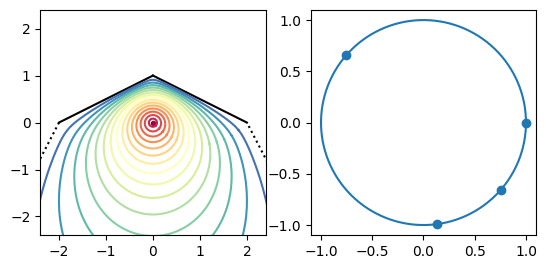

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0]
 * Zero: [1.2167713146228822]
 * Inf-norm of residuals: 0.000000
 * Iterations: 200
 * Convergence: false
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: false
 * Function Calls (f): 79
 * Jacobian Calls (df/dx): 20

In [270]:
poly = Polygon(SA[1im, -2, Inf], BilateralSymmetry{2}(1im), Dict(2 => 0.2))
@show poly.β
poly = circshift_poly(poly, 0)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

# Polygon constructors

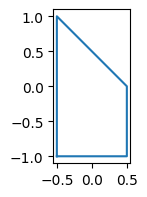

In [34]:
# NoSymmetry (finite)
poly = Polygon(SA[-0.5-1im, 0.5-1im, 0.5, -0.5+1im])
@assert all(poly.β .== [0.5, 0.5, 0.25, 0.75])
@assert all(poly.ℓ .== [1, 1, sqrt(2), 2])
@assert poly.s.symmetry isa NoSymmetry
@assert poly.s == classify_symmetry(poly)
@assert first_independent_vertex(poly) == 1

(fig, ax) = subplots(figsize=(3,2))
draw_polygon(poly, ax)
ax.set_aspect("equal")
;

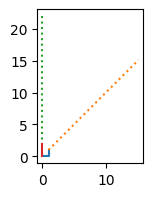

In [35]:

# NoSymmetry (infinite)
poly = Polygon(SA[0, 1, 1+1im, Inf, 2im], Dict(3 => -0.25, 4 => 1.25, 5 => 0))
@assert all(poly.β .== [0.5, 0.5, -0.25, 1.25, 0])
@assert all(poly.ℓ .== [1, 1, Inf, Inf, 2])
@assert poly.s.symmetry isa NoSymmetry
@assert poly.s == classify_symmetry(poly)
@assert first_independent_vertex(poly) == 1

(fig, ax) = subplots(figsize=(3,2))
draw_polygon(poly, ax)
ax.set_aspect("equal")
;

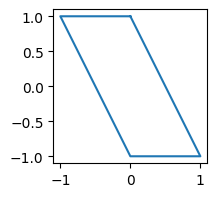

In [36]:

# CyclicSymmetry (finite)
poly = Polygon(SA[1im, -1+1im], CyclicSymmetry{2}())
@assert all(poly.β .== [ϕ, 1-ϕ, ϕ, 1-ϕ])
@assert all(poly.ℓ .== [1, κ, 1, κ])
@assert poly.s.symmetry isa CyclicSymmetry{2}
@assert poly.s == classify_symmetry(poly)
@assert first_independent_vertex(poly) == 1

(fig, ax) = subplots(figsize=(3,2))
draw_polygon(poly, ax)
ax.set_aspect("equal")
;

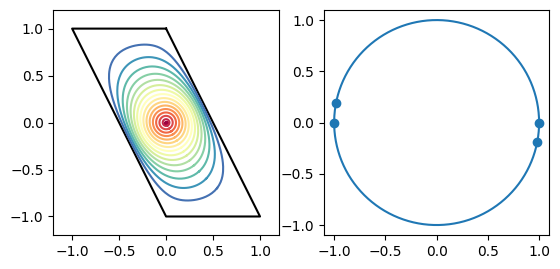

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0]
 * Zero: [-2.7301056318049666]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [ ]:
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

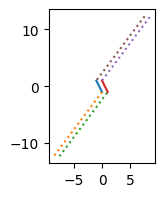

In [38]:

# CyclicSymmetry (infinite)
poly = Polygon(SA[1im, Inf, -1+1im], CyclicSymmetry{2}(), Dict(1 => -ϕ, 3 => ϕ))
@assert all(poly.β .== [-ϕ, 1, ϕ, -ϕ, 1, ϕ])
@assert all(poly.ℓ .== [Inf, Inf, sqrt(5), Inf, Inf, sqrt(5)])
@assert poly.s.symmetry isa CyclicSymmetry{2}
@assert poly.s == classify_symmetry(poly)
@assert first_independent_vertex(poly) == 1

(fig, ax) = subplots(figsize = (3, 2))
draw_polygon(poly, ax)
ax.set_aspect("equal")
;


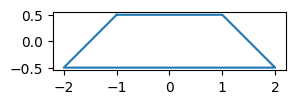

In [41]:

# BilateralSymmetry{0} (finite)
poly = Polygon(SA[-1+0.5im, -2-0.5im], BilateralSymmetry{0}(1.0im))
@assert all(poly.β .== [0.25, 0.75, 0.75, 0.25])
@assert all(poly.ℓ .== [sqrt(2), 4, sqrt(2), 2])
@assert poly.s.symmetry isa BilateralSymmetry{0}
@assert poly.s == classify_symmetry(poly)
@assert first_independent_vertex(poly) ∈ [1, 3]

(fig, ax) = subplots(figsize=(3,2))
draw_polygon(poly, ax)
ax.set_aspect("equal")
;

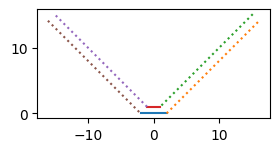

In [43]:

# BilateralSymmetry{0} (infinite)
poly = Polygon(
    SA[-1+1im, Inf, -2],
    BilateralSymmetry{0}(1im),
    Dict(1 => -0.25, 3 => 0.25),
)
@assert all(poly.β .== [-0.25, 1, 0.25, 0.25, 1, -0.25])
@assert all(poly.ℓ .== [Inf, Inf, 4, Inf, Inf, 2])
@assert poly.s.symmetry isa BilateralSymmetry{0}
@assert poly.s == classify_symmetry(poly)
@assert first_independent_vertex(poly) ∈ [1, 4]

(fig, ax) = subplots(figsize=(3,2))
draw_polygon(poly, ax)
ax.set_aspect("equal")
;

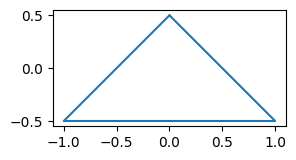

In [46]:
# BilateralSymmetry{1} (finite)
poly = Polygon(SA[0.5im, -1-0.5im], BilateralSymmetry{1}(1im))
@assert all(poly.β .== [0.5, 0.75, 0.75])
@assert all(poly.ℓ .== [sqrt(2), 2, sqrt(2)])
@assert poly.s.symmetry isa BilateralSymmetry{1}
@assert poly.s == classify_symmetry(poly)
@assert first_independent_vertex(poly) ∈ [1, 3]

(fig, ax) = subplots(figsize=(3,2))
draw_polygon(poly, ax)
ax.set_aspect("equal")
;

(idx₁, num_indep, num_free, num_infs, poly.w[idx₁]) = (1, 2, 1, 0, 0.0 + 0.5im)
idxs = SchwarzChristoffelDisk.ProblemIndices{0, 1}(1, Int64[], [1])


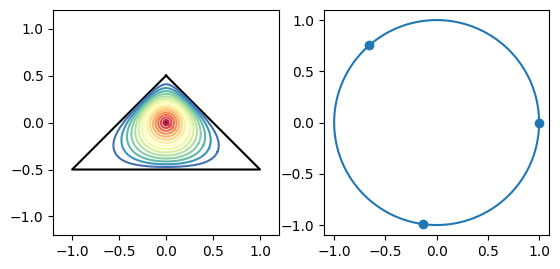

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0]
 * Zero: [-0.2919241911434112]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [ ]:
poly_nosym = remove_symmetry(poly)
poly_rotated(k) = begin
        N = length(poly.w)
        Polygon(SVector(ntuple(i -> poly.w[mod1(i - k, N)], N)),
                poly.s,
                SVector(ntuple(i -> poly.β[mod1(i - k, N)], N)),
                SVector(ntuple(i -> poly.ℓ[mod1(i - k, N)], N)))
end
res, scderiv = sc_parameter_problem(poly_rotated(0))
sc_plot(scderiv, 15, 500, "Spectral", false)
res

## k+1 works, k doesn't

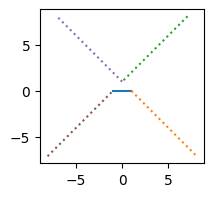

In [56]:
# BilateralSymmetry{1} (infinity not on axis)
poly = Polygon(
    SA[1im, Inf, -1],
    BilateralSymmetry{1}(1im),
    Dict(1 => -0.5, 3 => -0.25),
)
@assert all(poly.β .== [-0.5, 1.5, -0.25, -0.25, 1.5])
@assert all(poly.ℓ .== [Inf, Inf, 2, Inf, Inf])
@assert poly.s.symmetry isa BilateralSymmetry{1}
@assert poly.s == classify_symmetry(poly)
@assert first_independent_vertex(poly) == 1

(fig, ax) = subplots(figsize=(3,2))
draw_polygon(poly, ax)
ax.set_aspect("equal")
;

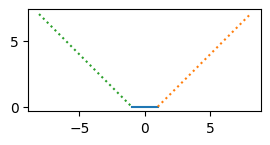

In [ ]:
# BilateralSymmetry{1} (infinity on axis)
poly = Polygon(SA[Inf, -1], BilateralSymmetry{1}(1im), Dict(2 => 0.25))
@assert all(poly.β .== [1.5, 0.25, 0.25])
@assert all(poly.ℓ .== [Inf, 2, Inf])
@assert poly.s isa BilateralSymmetry{1}
@assert poly.s == classify_symmetry(poly)
@assert first_independent_vertex(poly) == 2

(fig, ax) = subplots(figsize=(3,2))
draw_polygon(poly, ax)
ax.set_aspect("equal")
;

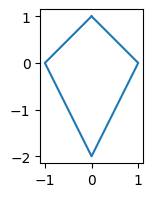

0

In [ ]:
# BilateralSymmetry{2} (finite)
poly = Polygon(SA[1im, -1, -2im], BilateralSymmetry{2}(1im))
@assert all(poly.β .== [0.5, 0.75-ϕ, 2ϕ, 0.75-ϕ])
@assert all(poly.ℓ .== [sqrt(2), sqrt(5), sqrt(5), sqrt(2)])
@assert poly.s isa BilateralSymmetry{2}
@assert poly.s == classify_symmetry(poly)
@assert first_independent_vertex(poly) ∈ [1, 3]

(fig, ax) = subplots(figsize=(3,2))
draw_polygon(poly, ax)
ax.set_aspect("equal")
;

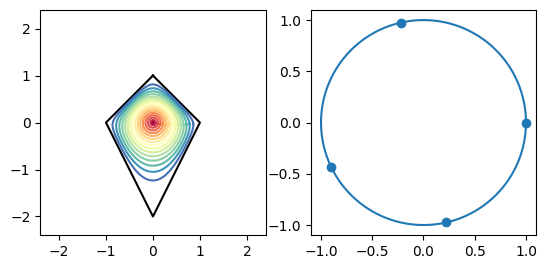

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0]
 * Zero: [0.28653121987889973]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [ ]:
poly_nosym = remove_symmetry(poly)
poly_rotated(k) = begin
        N = length(poly.w)
        Polygon(SVector(ntuple(i -> poly.w[mod1(i - k, N)], N)),
                poly.s,
                SVector(ntuple(i -> poly.β[mod1(i - k, N)], N)),
                SVector(ntuple(i -> poly.ℓ[mod1(i - k, N)], N)))
end
res, scderiv = sc_parameter_problem(poly_rotated(0))
sc_plot(scderiv, 15, 500, "Spectral", false)
res

## k+1 doesn't work, k works

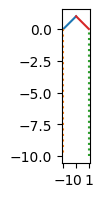

1

In [ ]:
# BilateralSymmetry{2} (one infinity on axis)
poly = Polygon(SA[1im, -1, Inf], BilateralSymmetry{2}(1im), Dict(2 => 0.25))
@assert all(poly.β .== [0.5, 0.25, 1, 0.25])
@assert all(poly.ℓ .== [sqrt(2), Inf, Inf, sqrt(2)])
@assert poly.s isa BilateralSymmetry{2}
@assert poly.s == classify_symmetry(poly)
@assert first_independent_vertex(poly) ∈ [1, 3]

(fig, ax) = subplots(figsize=(3,2))
draw_polygon(poly, ax)
ax.set_aspect("equal")
;
SchwarzChristoffelDisk.ProblemIndices(poly)

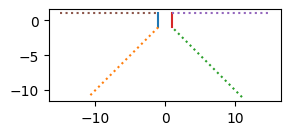

SchwarzChristoffelDisk.ProblemIndices{2, 1}(2, [3, 5], [5])

In [20]:
# BilateralSymmetry{2} (both infinities on axis)
poly = Polygon(
    SA[Inf, -1+1im, -1-1im, Inf],
    BilateralSymmetry{2}(1im),
    Dict(1 => 2, 2 => -0.5, 3 => -0.25),
)
@assert all(poly.β .== [2, -0.5, -0.25, 1.5, -0.25, -0.5])
@assert all(poly.ℓ .== [Inf, 2, Inf, Inf, 2, Inf])
@assert poly.s isa BilateralSymmetry{2}
@assert poly.s == classify_symmetry(poly)
@assert first_independent_vertex(poly) ∈ [1, 4]

(fig, ax) = subplots(figsize=(3,2))
draw_polygon(poly, ax)
ax.set_aspect("equal")
;
SchwarzChristoffelDisk.ProblemIndices(Polygon(poly.w,NoSymmetry(),poly.β,poly.ℓ))


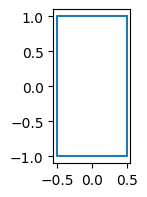

In [101]:
# DihedralSymmetry{2,0} (finite)
poly = Polygon(SA[0.5+1im], DihedralSymmetry{2,0}(1im))
@assert all(poly.β .== [0.5, 0.5, 0.5, 0.5])
@assert all(poly.ℓ .== [1, 2, 1, 2])
@assert poly.s isa DihedralSymmetry{2,0}
@assert poly.s == classify_symmetry(poly)

(fig, ax) = subplots(figsize=(3,2))
draw_polygon(poly, ax)
ax.set_aspect("equal")
;

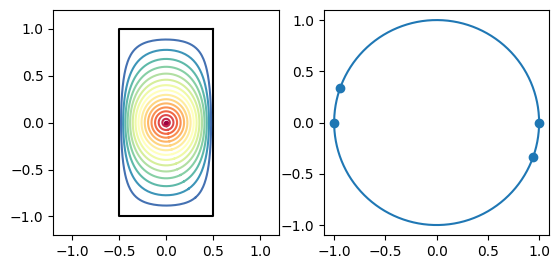

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0]
 * Zero: [-2.09309477204759]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [ ]:
poly_nosym = remove_symmetry(poly)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

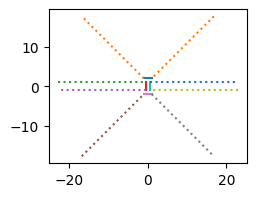

SchwarzChristoffelDisk.ProblemIndices{4, 3}(3, [4, 6, 9, 12], [6, 9, 12])

In [21]:
# DihedralSymmetry{2,0} (infinite)
poly = Polygon(SA[0.5+1im, Inf, 1+2im], DihedralSymmetry{2,0}(-1im), Dict(1 => -0.5, 2 => 1.25, 3 => -0.25))
@assert all(poly.β .== [-0.5, 1.25, -0.25, -0.25, 1.25, -0.5, -0.5, 1.25, -0.25, -0.25, 1.25, -0.5])
@assert all(poly.ℓ .== [Inf, Inf, 2, Inf, Inf, 2, Inf, Inf, 2, Inf, Inf, 2])
@assert poly.s isa DihedralSymmetry{2,0}
@assert poly.s == classify_symmetry(poly)
@assert first_independent_vertex(poly) ∈ [1, 4, 7, 10]

(fig, ax) = subplots(figsize=(3,2))
draw_polygon(poly, ax)
ax.set_aspect("equal")
;
SchwarzChristoffelDisk.ProblemIndices(Polygon(poly.w,NoSymmetry(),poly.β,poly.ℓ))

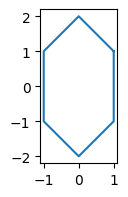

In [32]:
# DihedralSymmetry{2,1} (finite)
poly = Polygon(SA[1+1im, 2im], DihedralSymmetry{2,1}(1im))
@assert all(poly.β .== [0.25, 0.5, 0.25, 0.25, 0.5, 0.25])
@assert all(poly.ℓ .== [sqrt(2), sqrt(2), 2, sqrt(2), sqrt(2), 2])
@assert poly.s isa DihedralSymmetry{2,1}
@assert poly.s == classify_symmetry(poly)
@assert first_independent_vertex(poly) ∈ [1, 2, 4, 5]

(fig, ax) = subplots(figsize=(3,2))
draw_polygon(poly, ax)
ax.set_aspect("equal")
;

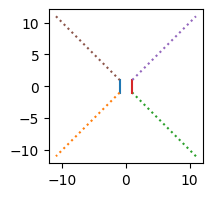

SchwarzChristoffelDisk.ProblemIndices{2, 1}(3, [4, 6], [6])

In [22]:
# DihedralSymmetry{2,1} (infinite)
poly = Polygon(SA[1+1im, Inf], DihedralSymmetry{2,1}(1im), Dict(1 => -0.25))
@assert all(poly.β .== [-0.25, 1.5, -0.25, -0.25, 1.5, -0.25])
@assert all(poly.ℓ .== [Inf, Inf, 2, Inf, Inf, 2])
@assert poly.s isa DihedralSymmetry{2,1}
@assert poly.s == classify_symmetry(poly)
@assert first_independent_vertex(poly) ∈ [1, 2, 4, 5]

(fig, ax) = subplots(figsize=(3,2))
draw_polygon(poly, ax)
ax.set_aspect("equal")
;
SchwarzChristoffelDisk.ProblemIndices(Polygon(poly.w,NoSymmetry(),poly.β,poly.ℓ))

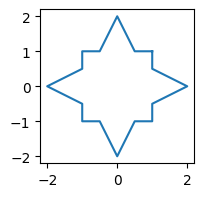

In [34]:
# DihedralSymmetry{4,2} (finite)
poly = Polygon(SA[1+1im, 0.5+1im, 2im], DihedralSymmetry{4,2}(2im))
@assert all(poly.β .== [0.5, -ϕ, 2ϕ, -ϕ, 0.5, -ϕ, 2ϕ, -ϕ, 0.5, -ϕ, 2ϕ, -ϕ, 0.5, -ϕ, 2ϕ, -ϕ])
@assert all(poly.ℓ .== [1, κ, κ, 1, 1, κ, κ, 1, 1, κ, κ, 1, 1, κ, κ, 1] / 2)
@assert poly.s isa DihedralSymmetry{4,2}
@assert poly.s == classify_symmetry(poly)
@assert isodd(first_independent_vertex(poly))

(fig, ax) = subplots(figsize = (3, 2))
draw_polygon(poly, ax)
ax.set_aspect("equal")
;


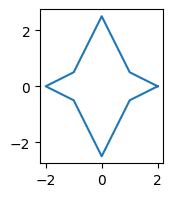

In [104]:
# DihedralSymmetry{2,2} (finite)
poly = Polygon(SA[2, 1+0.5im, 2.5im], DihedralSymmetry{2,2}(2im))
@assert all(poly.β .≈ [2ϕ, 0.5-2ϕ, 2ϕ, 0.5-2ϕ, 2ϕ, 0.5-2ϕ, 2ϕ, 0.5-2ϕ])
@assert all(poly.ℓ .== [κ/2, κ, κ, κ/2, κ/2, κ, κ, κ/2])
@assert poly.s isa DihedralSymmetry{2,2}
@assert poly.s == classify_symmetry(poly)
@assert isodd(first_independent_vertex(poly))

(fig, ax) = subplots(figsize = (3, 2))
draw_polygon(poly, ax)
ax.set_aspect("equal")
;

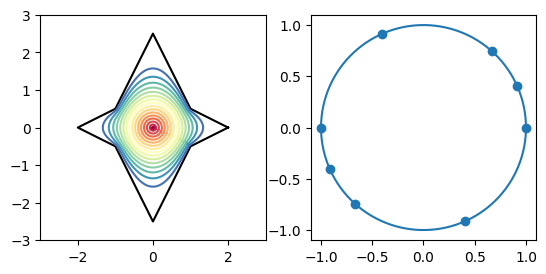

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0]
 * Zero: [1.0129538932027808]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [105]:
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

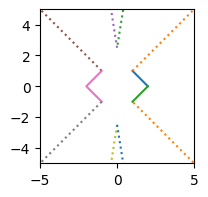

SchwarzChristoffelDisk.ProblemIndices{4, 3}(1, [2, 4, 6, 10], [6, 7, 12])

In [23]:
# DihedralSymmetry{2,2} (infinite, infinities not on axes)
poly = Polygon(
    SA[2, 1+1im, Inf, 2.5im],
    DihedralSymmetry{2,2}(1im),
    Dict(2 => -0.5, 4 => -0.9),
)
@assert all(poly.β .≈ [0.5, -0.5, 1.2, -0.9, 1.2, -0.5, 0.5, -0.5, 1.2, -0.9, 1.2, -0.5])
@assert all(poly.ℓ .== [sqrt(2), Inf, Inf, Inf, Inf, sqrt(2), sqrt(2), Inf, Inf, Inf, Inf, sqrt(2)])
@assert poly.s isa DihedralSymmetry{2,2}
@assert poly.s == classify_symmetry(poly)
@assert first_independent_vertex(poly) ∈ [1, 4, 7, 10]

(fig, ax) = subplots(figsize = (3, 2))
draw_polygon(poly, ax)
ax.set_aspect("equal")
ax.set_ylim((-5,5))
ax.set_xlim((-5,5))
;

SchwarzChristoffelDisk.ProblemIndices(Polygon(poly.w,NoSymmetry(),poly.β,poly.ℓ))

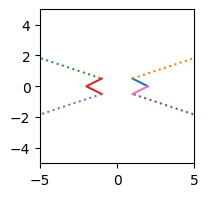

SchwarzChristoffelDisk.ProblemIndices{2, 3}(1, [2, 4], [4, 5, 8])

In [24]:
# DihedralSymmetry{2,2} (infinite, infinity on one axis)
poly = Polygon(SA[2, 1+0.5im, Inf], DihedralSymmetry{2,2}(2im), Dict(2 => -0.75))
@assert all(poly.β .≈ [2ϕ, -0.75, 2.5-2ϕ, -0.75, 2ϕ, -0.75, 2.5-2ϕ, -0.75])
@assert all(poly.ℓ .== [κ/2, Inf, Inf, κ/2, κ/2, Inf, Inf, κ/2])
@assert poly.s isa DihedralSymmetry{2,2}
@assert poly.s == classify_symmetry(poly)
@assert isodd(first_independent_vertex(poly))

(fig, ax) = subplots(figsize = (3, 2))
draw_polygon(poly, ax)
ax.set_aspect("equal")
ax.set_ylim((-5,5))
ax.set_xlim((-5,5))
;
SchwarzChristoffelDisk.ProblemIndices(Polygon(poly.w,NoSymmetry(),poly.β,poly.ℓ))

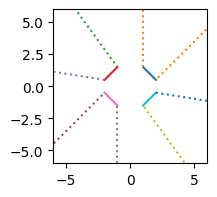

SchwarzChristoffelDisk.ProblemIndices{4, 3}(2, [3, 5, 8, 11], [11, 8, 5])

In [11]:
# DihedralSymmetry{2,2} (infinite, infinities on both axes)
poly = Polygon(SA[Inf, 2+0.5im, 1+1.5im, Inf], DihedralSymmetry{2,2}(2im), Dict(2 => -0.5, 3 => -0.25, 4 => 1.2))
@assert all(
    poly.β .== [1.3, -0.5, -0.25, 1.2, -0.25, -0.5, 1.3, -0.5, -0.25, 1.2, -0.25, -0.5],
)
@assert all(
    poly.ℓ .==
    [Inf, sqrt(2), Inf, Inf, sqrt(2), Inf, Inf, sqrt(2), Inf, Inf, sqrt(2), Inf],
)
@assert poly.s isa DihedralSymmetry{2,2}
@assert poly.s == classify_symmetry(poly)
@assert first_independent_vertex(poly) ∈ [1, 4, 7, 10]

(fig, ax) = subplots(figsize = (3, 2))
draw_polygon(poly, ax)
ax.set_aspect("equal")
ax.set_xlim((-6,6))
ax.set_ylim((-6,6))
# Looks like plotting is broken!
;
SchwarzChristoffelDisk.ProblemIndices(Polygon(poly.w,NoSymmetry(),poly.β,poly.ℓ))

sym = CyclicSymmetry{2}()


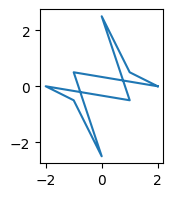

In [ ]:
# test for axis on right hand side of base
# DihedralSymmetry{2,2} (finite)
poly = Polygon(SA[2, 1+0.5im, 2.5im], DihedralSymmetry{2,2}(2+0im))
@assert poly.s isa DihedralSymmetry{2,2}
sym = classify_symmetry(poly)
@show sym

(fig, ax) = subplots(figsize = (3, 2))
draw_polygon(poly, ax)
ax.set_aspect("equal")
;

# Forward transform

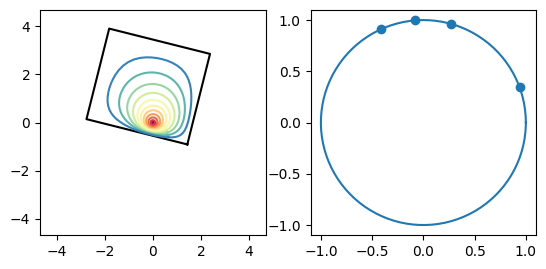

4-element SizedVector{4, ComplexF64, Vector{ComplexF64}} with indices SOneTo(4):
 1.4330497514354936 - 0.9090163889198571im
  2.376328764283067 + 2.852979370053513im
 -1.813565611580593 + 3.9035491852245605im
 -2.756844478122157 + 0.14155320287751874im

In [106]:
pv = SchwarzChristoffelDisk.prevertices(
    MVector{2}(1, 0),
    BilateralSymmetry{0}(complex(0,1)),
    0
)
pβ = SA[1//2, 1//2, 1//2, 1//2]
scderiv = SchwarzChristoffel(pv, pβ)
sc_plot(scderiv, 10, 200, "Spectral", false)
[sc_trafo(scderiv, z) for z ∈ scderiv.z]

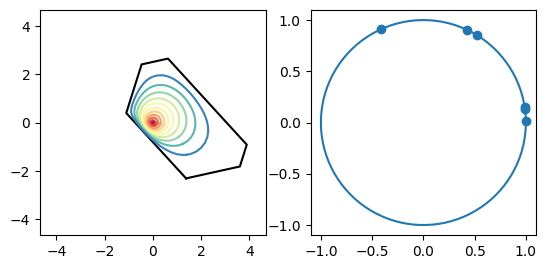

6-element SizedVector{6, ComplexF64, Vector{ComplexF64}} with indices SOneTo(6):
    1.377630030153804 - 2.3132172053688276im
    3.606226576280783 - 1.8204743238860883im
    3.891667653426324 - 0.9169569293498926im
   0.6274559123576473 + 2.6493612961423643im
 -0.46426173955841865 + 2.4079824498916462im
  -1.1004546563435706 + 0.3942170322373289im

In [107]:
pv = SchwarzChristoffelDisk.prevertices(
    MVector{3}(2.0, -4.0, 2.0),
    BilateralSymmetry{0}(complex(0,1)),
    0
)
pβ = SA[1//3, 1//3, 1//3, 1//3, 1//3, 1//3]
scderiv = SchwarzChristoffel(pv, pβ)
sc_plot(scderiv, 10, 200, "Spectral", false)
[sc_trafo(scderiv, z) for z ∈ scderiv.z]

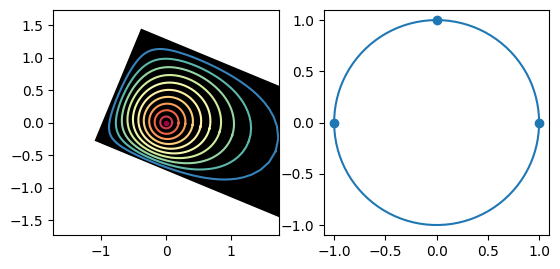

In [83]:
scderiv = SchwarzChristoffel(SA[0, π/2, π], SA[1, 1/2, 1/2])
sc_plot(scderiv, 10, 200, "Spectral", true)

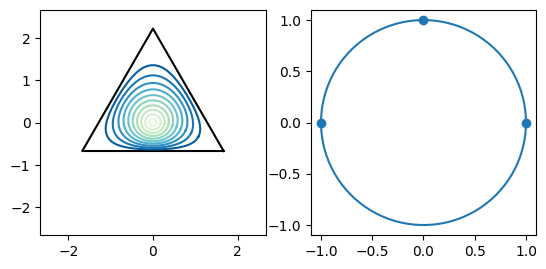

In [87]:
scderiv = SchwarzChristoffel(SA[0, π/2, π], SA[2/3, 2/3, 2/3])
sc_plot(scderiv, 10, 200, "GnBu")

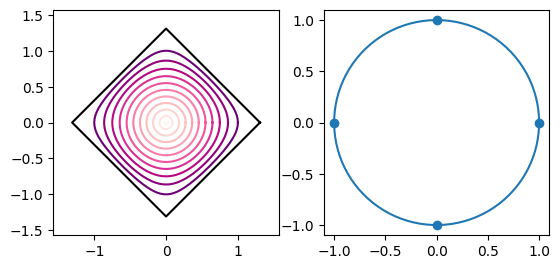

In [86]:
scderiv = SchwarzChristoffel(SA[0, π/2, π, 3π/2], SA[1/2, 1/2, 1/2, 1/2])
sc_plot(scderiv, 10, 200, "RdPu")

# Parameter problem

### NoSymmetry

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 1}(0, 4, [1], [1])


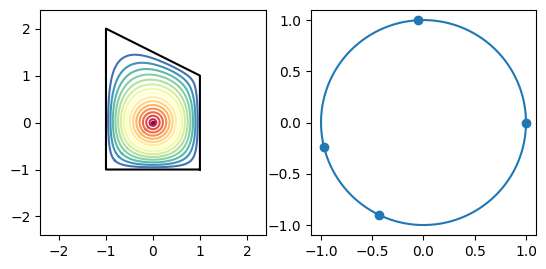

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0]
 * Zero: [-0.08631919255256677, 0.6999133374019432, -0.8337245575752595]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [63]:
poly = Polygon(SA[-1-1im, 1-1im, 1+1im, -1+2im])

res, scderiv = sc_parameter_problem(circshift_poly(poly,3))
sc_plot(scderiv, 15, 500, "Spectral", false)
res

poly.s = PolygonSymmetry{NoSymmetry}(NoSymmetry(), 1)
idxs = SchwarzChristoffelDisk.ProblemIndices{1, 2}(0, 5, [1], [1, 2])


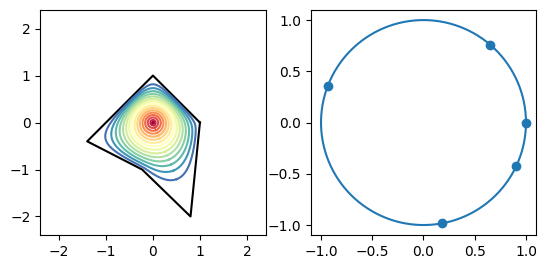

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0]
 * Zero: [-0.8025353790313561, -0.10197605367905685, 0.8064599591520997, 0.761314118632102]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [64]:
poly = Polygon(SA[1.0, 1.0im, complex(-1.4, -0.4), complex(-0.23, -1), complex(0.8, -2)])
@show poly.s
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 3}(0, 6, [1], [1, 2, 3])


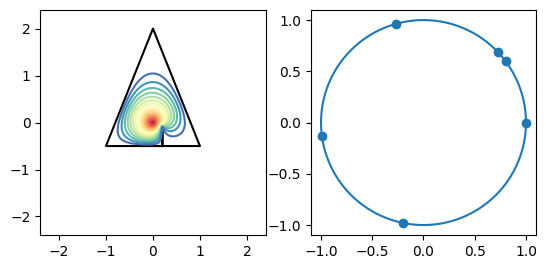

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0, 0.0]
 * Zero: [1.7263538939655019, -2.254670871995835, -0.2717045792792112, 0.1402983898812862, -0.357676334995962]
 * Inf-norm of residuals: 0.000000
 * Iterations: 8
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 9
 * Jacobian Calls (df/dx): 8

In [65]:
poly = Polygon(SA[0.2-0.5im, 1-0.5im, 2im, -1-0.5im, 0.2-0.5im, 0.2-0.1im])
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

### CyclicSymmetry

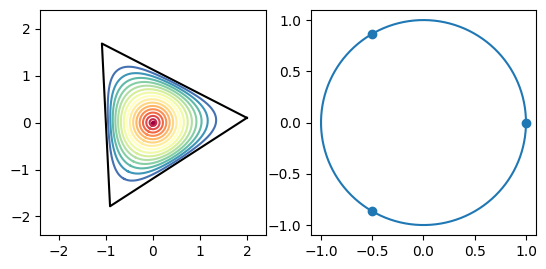

In [66]:
poly = Polygon(SA[2+0.1im], CyclicSymmetry{3}())
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500)
res

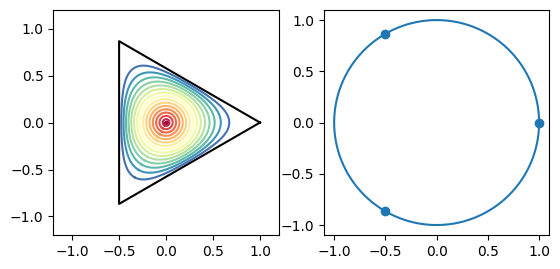

In [67]:
poly = Polygon(SA[1], CyclicSymmetry{3}())
poly = circshift_poly(poly, 0)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

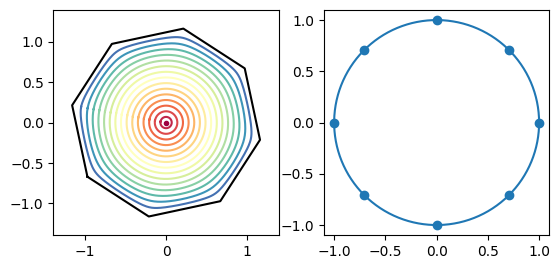

In [68]:
poly = Polygon(SA[randn(ComplexF64)], CyclicSymmetry{8}())
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{0, 1}(0, 1, Int64[], [1])


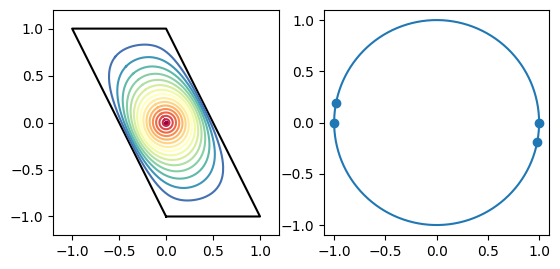

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0]
 * Zero: [2.730105006004037]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [69]:
poly = Polygon(SA[1im, -1+1im], CyclicSymmetry{2}())
poly = circshift_poly(poly, 2)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{0, 1}(0, 1, Int64[], [1])


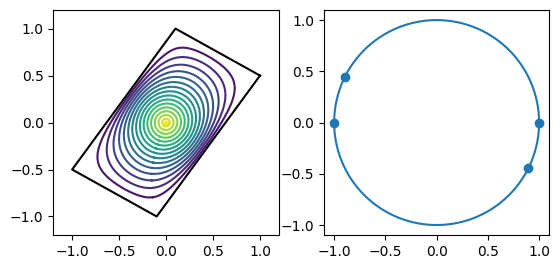

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0]
 * Zero: [1.7577342306840575]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [70]:
poly = Polygon(SA[1.0+0.5im, 0.1+1.0im], CyclicSymmetry{2}())
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "viridis_r")
res

poly.s = PolygonSymmetry{CyclicSymmetry{3}}(CyclicSymmetry{3}(), 1)
idxs = SchwarzChristoffelDisk.ProblemIndices{0, 1}(0, 1, Int64[], [1])


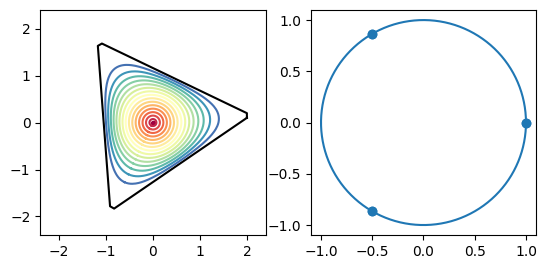

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0]
 * Zero: [8.120430362298267]
 * Inf-norm of residuals: 0.000000
 * Iterations: 8
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 9
 * Jacobian Calls (df/dx): 9

In [73]:
poly = Polygon(SA[2+0.1im, 2+0.2im], CyclicSymmetry{3}())
poly_nosym = remove_symmetry(poly)
@show poly.s
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 0}(0, 9, [1], Int64[])


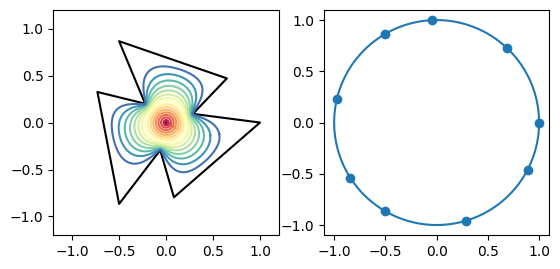

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0]
 * Zero: [0.0040779744326238055, 0.5265655364711855]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [74]:
poly = Polygon(SA[1, 0.3*cispi(0.1), 0.8*cispi(0.2)], CyclicSymmetry{3}())
poly = circshift_poly(poly, -1)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

poly.s = PolygonSymmetry{CyclicSymmetry{3}}(CyclicSymmetry{3}(), 1)
idxs = SchwarzChristoffelDisk.ProblemIndices{1, 1}(0, 12, [1], [1])


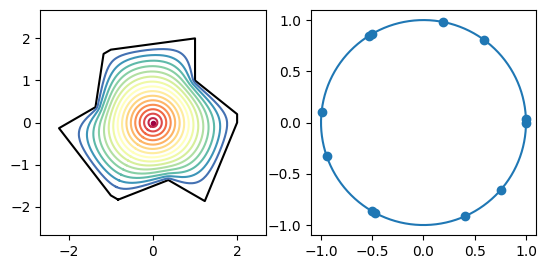

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0]
 * Zero: [-3.295755000067789, 0.7296438878453527, -0.4899787349815687]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [76]:
poly = Polygon(SA[2, 2+0.2im, 1+1im, 1+2im], CyclicSymmetry{3}())
@show poly.s
poly = circshift_poly(poly, 3)
poly_nosym = remove_symmetry(poly)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

### DihedralSymmetry no Infinities

poly.s = PolygonSymmetry{DihedralSymmetry{2, 0, ComplexF64}}(DihedralSymmetry{2, 0, ComplexF64}(0.447213595499958 + 0.8944271909999159im), 4)
idxs = SchwarzChristoffelDisk.ProblemIndices{0, 1}(3, 4, Int64[], [4])


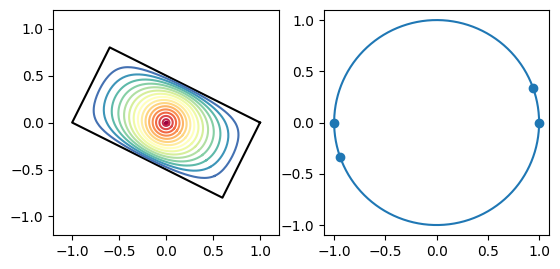

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0]
 * Zero: [2.0930932510459135]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [147]:
poly = Polygon(SA[1], DihedralSymmetry{2,0}(1+2im))
@show poly.s
poly = circshift_poly(poly, 0)
# poly_nosym = remove_symmetry(poly)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

In [149]:
fp = SchwarzChristoffelDisk.free_params(poly)
SchwarzChristoffelDisk.circshift_noalloc_poplast(
    SchwarzChristoffelDisk.prevertex_params(MVector{length(fp)}(1:length(fp)), poly.s.symmetry), 0)

3-element MVector{3, Int64} with indices SOneTo(3):
  1
 -1
  1

### BilateralSymmetry

poly.s = PolygonSymmetry{BilateralSymmetry{0, ComplexF64}}(BilateralSymmetry{0, ComplexF64}(0.0 + 0.9999999999999999im), 4)
idxs = SchwarzChristoffelDisk.ProblemIndices{0, 4}(3, 4, Int64[], [4, 5, 6, 7])


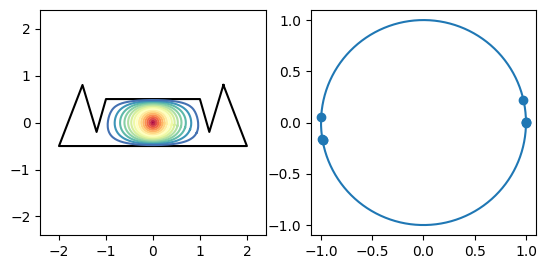

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0]
 * Zero: [2.5818370903214123, 3.3479984591571856, 2.29296958467432, -8.258681651306937]
 * Inf-norm of residuals: 0.000000
 * Iterations: 10
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 11
 * Jacobian Calls (df/dx): 11

In [154]:
# BilateralSymmetry{0}
# idxs = SchwarzChristoffelDisk.ProblemIndices{0, 4}(3, 4, Int64[], [4, 5, 6, 7])
poly = Polygon(SA[-1+0.5im, -1.2-0.2im, -1.5+0.8im, -2-0.5im], BilateralSymmetry{0}(1.0im))
poly = circshift_poly(poly, 3)
@show poly.s
# poly_nosym = remove_symmetry(poly)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

# kN is the first_independent_vertex `idx₁`
# therefore, shift = (idx₁ - 1)

idxs = SchwarzChristoffelDisk.ProblemIndices{0, 3}(4, 5, Int64[], [5, 6, 7])


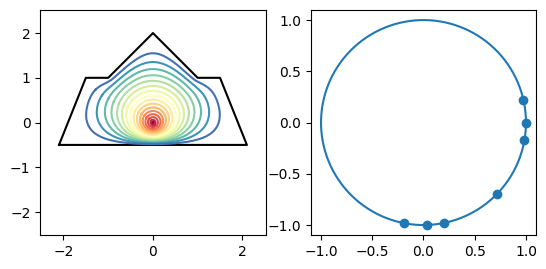

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0]
 * Zero: [1.2561478888650235, -0.2785446333750579, -2.945327125917079]
 * Inf-norm of residuals: 0.000000
 * Iterations: 7
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 8
 * Jacobian Calls (df/dx): 8

In [155]:
# BilateralSymmetry{1}
poly = Polygon(SA[2im, -1+1im, -1.5+1im, -2.1-0.5im], BilateralSymmetry{1}(1im))
poly = circshift_poly(poly, 4)
poly_nosym = remove_symmetry(poly)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

# kN is idx₁ + 1, because the vertex on the axis can be inferred from the intersection
# of the sides coming off the neighbouring vertices (given β)
# the shift is therefore kN - 2

In [156]:
fp = SchwarzChristoffelDisk.free_params(poly)
SchwarzChristoffelDisk.circshift_noalloc_poplast(
    SchwarzChristoffelDisk.prevertex_params(MVector{length(fp)}(1:length(fp)), poly.s.symmetry), 1)

6-element MVector{6, Int64} with indices SOneTo(6):
 -1
  0
  1
  2
  3
 -3

idxs = SchwarzChristoffelDisk.ProblemIndices{0, 3}(4, 5, Int64[], [5, 6, 7])


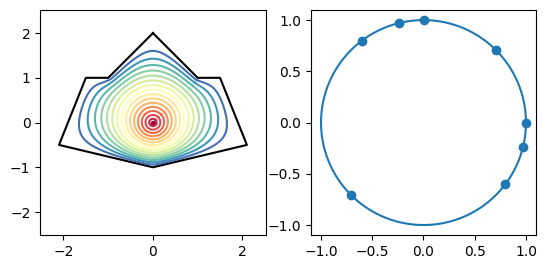

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0]
 * Zero: [1.4510057445006863, 0.5016122034925266, -1.1730288939515947]
 * Inf-norm of residuals: 0.000000
 * Iterations: 9
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 10
 * Jacobian Calls (df/dx): 7

In [157]:
# BilateralSymmetry{2}
poly = Polygon(SA[2im, -1+1im, -1.5+1im, -2.1-0.5im, -1im], BilateralSymmetry{2}(1im))
poly = circshift_poly(poly, 0)
poly_nosym = remove_symmetry(poly)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res


In [159]:
fp = SchwarzChristoffelDisk.free_params(poly)
SchwarzChristoffelDisk.circshift_noalloc_poplast(
    SchwarzChristoffelDisk.prevertex_params(MVector{length(fp)}(1:length(fp)), poly.s.symmetry), 0)

7-element MVector{7, Int64} with indices SOneTo(7):
  0
  1
  2
  3
  0
 -3
 -2

poly.s = PolygonSymmetry{BilateralSymmetry{1, ComplexF64}}(BilateralSymmetry{1, ComplexF64}(0.0 + 1.0im), 3)
idxs = SchwarzChristoffelDisk.ProblemIndices{0, 1}(2, 1, Int64[], [1])
  0.814445 seconds (1.98 M allocations: 95.302 MiB, 5.53% gc time, 99.62% compilation time)


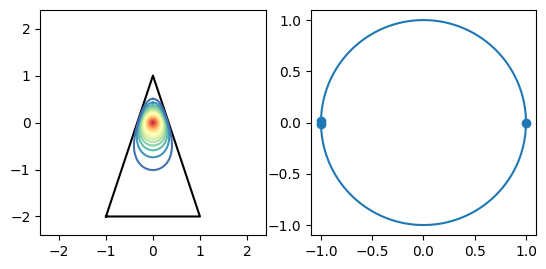

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0]
 * Zero: [4.496561427431225]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [160]:
poly = Polygon(SA[complex(-1, -2), complex(1, -2), 1.0im])
@show poly.s
@time res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

poly.s = PolygonSymmetry{BilateralSymmetry{1, ComplexF64}}(BilateralSymmetry{1, ComplexF64}(0.0 + 0.9999999999999999im), 1)
idxs = SchwarzChristoffelDisk.ProblemIndices{0, 1}(0, 2, Int64[], [2])
  0.002014 seconds (808 allocations: 32.531 KiB)


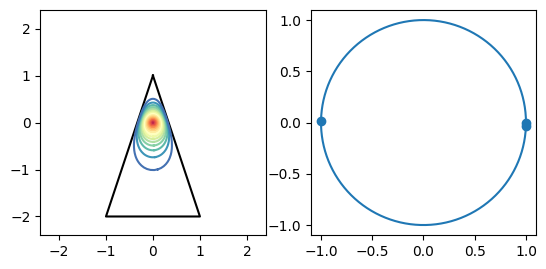

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0]
 * Zero: [4.496561427431219]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [161]:
poly = Polygon(SA[1.0im, -1-2im, 1-2im])
poly = circshift_poly(poly, 0)
@show poly.s
@time res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

poly.s = PolygonSymmetry{DihedralSymmetry{2, 1, ComplexF64}}(DihedralSymmetry{2, 1, ComplexF64}(-0.0 - 2.0im), 3)
idxs = SchwarzChristoffelDisk.ProblemIndices{0, 3}(2, 3, Int64[], [3, 4, 5])
  0.025630 seconds (8.49 k allocations: 494.391 KiB)


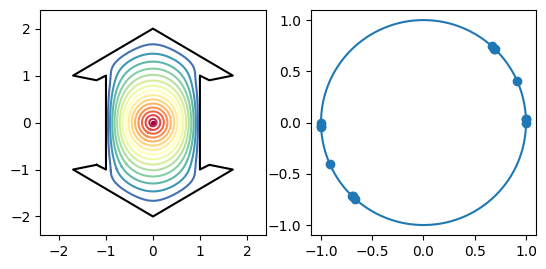

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0]
 * Zero: [4.616203092210156, -2.2459656422019147, -4.167197016374285]
 * Inf-norm of residuals: 0.000000
 * Iterations: 16
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 17
 * Jacobian Calls (df/dx): 10

In [164]:
poly = Polygon(SA[1+1im, 1.2+0.9im, 1.7+1im, 2im], DihedralSymmetry{2,1}(1im))
poly = circshift_poly(poly, 6) # Fails with 5 and 12
@show poly.s
@time res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

### BilateralSymmetry one infinity

idxs = SchwarzChristoffelDisk.ProblemIndices{0, 1}(0, 2, Int64[], [2])


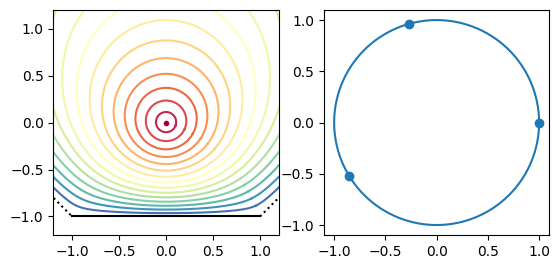

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0]
 * Zero: [-0.338069784522037]
 * Inf-norm of residuals: 0.000000
 * Iterations: 3
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 4
 * Jacobian Calls (df/dx): 4

In [165]:
# First official test case with infinity
poly = Polygon(SA[Inf, -1-1im], BilateralSymmetry{1}(1im), Dict(2 => 0.25))
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

poly.w[1] = Inf + 0.0im
idxs = SchwarzChristoffelDisk.ProblemIndices{0, 1}(0, 2, Int64[], [2])


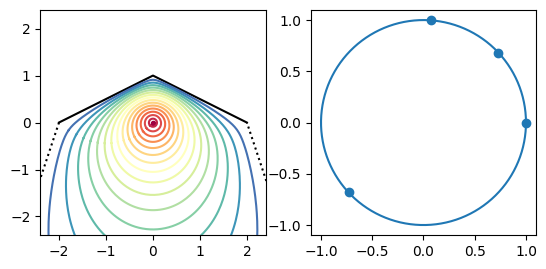

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0]
 * Zero: [-1.157675966076152]
 * Inf-norm of residuals: 0.000000
 * Iterations: 14
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 15
 * Jacobian Calls (df/dx): 15

In [166]:
poly = Polygon(SA[1im, -2, Inf], BilateralSymmetry{2}(1im), Dict(2 => 0.25))
poly = circshift_poly(poly, 2)
@show poly.w[1]
# poly_nosym = remove_symmetry(poly)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{0, 2}(0, 6, Int64[], [2, 3])


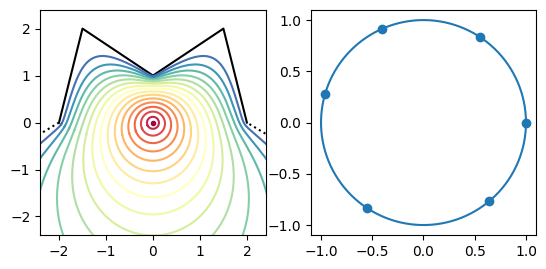

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0]
 * Zero: [0.12627022015208, -0.3792543153215349]
 * Inf-norm of residuals: 0.000000
 * Iterations: 200
 * Convergence: false
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: false
 * Function Calls (f): 61
 * Jacobian Calls (df/dx): 13

In [167]:
poly = Polygon(SA[1im, -1.5+2im, -2, Inf], BilateralSymmetry{2}(1im), Dict(3 => -0.25))
poly = circshift_poly(poly, 3)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

In [168]:
test = SA[1, 2, Inf, 3, Inf, 4, Inf, 5]
SchwarzChristoffelDisk.findall_circ(isinf, test, 14)

3-element Vector{Int64}:
 7
 3
 5

### CyclicSymmetry with infinities

In [169]:
poly = Polygon(SA[1+0.23im, Inf], CyclicSymmetry{4}(), Dict(1 => -0.8))

res, scderiv = sc_parameter_problem(poly)
# sc_plot(scderiv, 15, 500, "Spectral", false)
# res
[sc_trafo(scderiv, zk) for zk ∈ scderiv.z]

8-element Vector{ComplexF64}:
  1.0000000000000002 + 0.2300000000000001im
                 Inf + 0.0im
 -0.2300000000000001 + 0.9999999999999999im
                 Inf + 0.0im
 -1.0000000000000002 - 0.23000000000000004im
                 Inf + 0.0im
 0.23000000000000023 - 1.0000000000000002im
                 Inf + 0.0im

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 0}(0, 1, [2], Int64[])


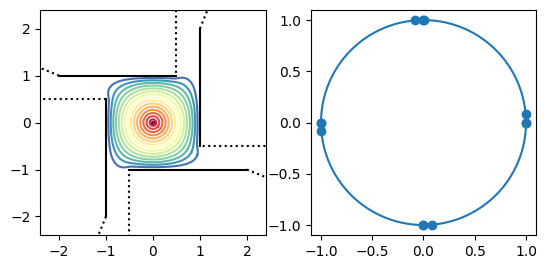

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0]
 * Zero: [-2.846698196220633, 9.96082094555366]
 * Inf-norm of residuals: 0.000000
 * Iterations: 9
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 10
 * Jacobian Calls (df/dx): 9

In [170]:
# ProblemIndices{1, 1}(0, 2, [4], [4])
# ProblemIndices{1, 1}(0, 1, [2], [4])
poly = Polygon(SA[1-0.5im, 1+2im, Inf], CyclicSymmetry{4}(), Dict(1 => -0.5, 2 => -0.123))
poly = circshift_poly(poly, 0)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 0}(0, 3, [4], Int64[])


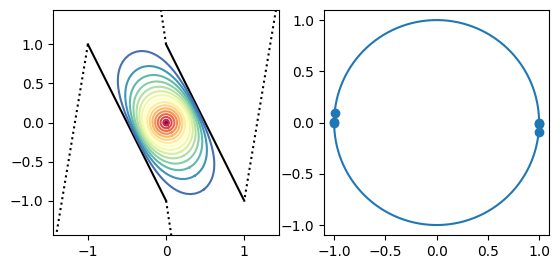

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0]
 * Zero: [3.6302062887154314, 2.109420343435405]
 * Inf-norm of residuals: 0.000000
 * Iterations: 8
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 9
 * Jacobian Calls (df/dx): 9

In [171]:
poly = Polygon(SA[1im, Inf, -1+1im], CyclicSymmetry{2}(), Dict(1 => -0.1, 3 => -0.8))
poly = circshift_poly(poly, 0)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res


idxs = SchwarzChristoffelDisk.ProblemIndices{1, 1}(0, 1, [2], [2])


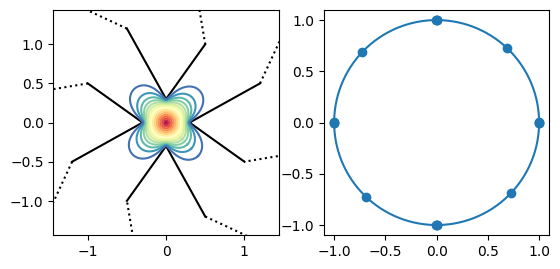

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0]
 * Zero: [-5.237745985713946, 0.07170087713224077, 4.898305050415986]
 * Inf-norm of residuals: 0.000000
 * Iterations: 9
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 10
 * Jacobian Calls (df/dx): 8

In [172]:
# ProblemIndices{1, 2}(0, 1, [2], [2, 6])
# ProblemIndices{1, 2}(0, 2, [3], [5, 6])
# ProblemIndices{1, 2}(0, 2, [3], [1, 6])
# ProblemIndices{1, 2}(0, 3, [5], [5, 6])
# not ProblemIndices{1, 2}(0, 1, [3], [1, 5])
poly = Polygon(SA[1-0.5im, 0.3, 1.2+0.5im, Inf], CyclicSymmetry{4}(), Dict(1 => -0.25, 3 => 0.2))

res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 2}(0, 1, [2], [2, 5])


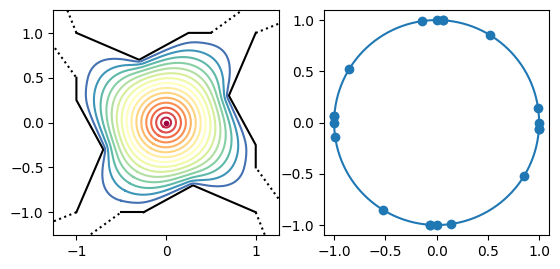

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0]
 * Zero: [-1.832111405989204, 0.610511002342163, 5.239938572044474, -3.2287811395223627]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [173]:
# ProblemIndices{1, 3}(0, 1, [2], [2, 3, 7])
# ProblemIndices{1, 3}(0, 2, [3], [3, 6, 1])
poly = Polygon(SA[1-0.5im, 1-0.25im, 0.7+0.3im, 1+1im, Inf], CyclicSymmetry{4}(), Dict(1 => -0.2, 4 => -0.25))
poly = circshift_poly(poly, 4)  # fails with 3, 8, 13, 18
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

### NoSymmetry with >1 infinities

poly.s = PolygonSymmetry{NoSymmetry}(NoSymmetry(), 1)
idxs = SchwarzChristoffelDisk.ProblemIndices{2, 1}(0, 1, [2, 4], [4])


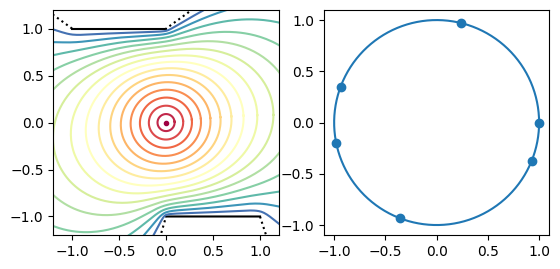

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0, 0.0]
 * Zero: [-0.09436208535902817, 0.9483532709434295, -0.5770287556685143, -0.43348147592600866, 1.403873024444363]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [174]:
# works with ProblemIndices{2, 1}(0, 4, [5, 1], [1])

poly = Polygon(
    SA[1.0im, complex(-1,1), -Inf, -1im, complex(1,-1), Inf], 
    Dict(1 => -0.2, 2 => -0.2, 4 => -0.41, 5 => -0.4, 6 => 1.6),
)
@show poly.s
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

poly.s = PolygonSymmetry{NoSymmetry}(NoSymmetry(), 1)
idxs = SchwarzChristoffelDisk.ProblemIndices{2, 4}(0, 1, [2, 4], [4, 5, 6, 7])


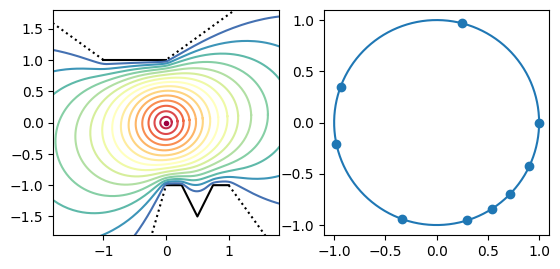

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 * Zero: [-0.1035810456101503, 0.946904201325627, -0.5847711801497136, 0.45392139437379986, 0.8822056441224374, 0.17241485077466945, -0.39249129775625985, -0.27106619497544765]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [175]:
poly = Polygon(
    SA[1.0im, complex(-1,1), -Inf, -1im, 0.25-1im, 0.5-1.5im, 0.75-1im, complex(1,-1), Inf], 
    Dict(1 => -0.2, 2 => -0.2, 4 => -0.41, 8 => -0.3, 9 => 1.5),
)
@show poly.s
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

# fig, ax = subplots()
# draw_polygon(poly, ax)

### DihedralSymmetry with >1 infinities

#### P=0

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 1}(9, 10, [12], [12])


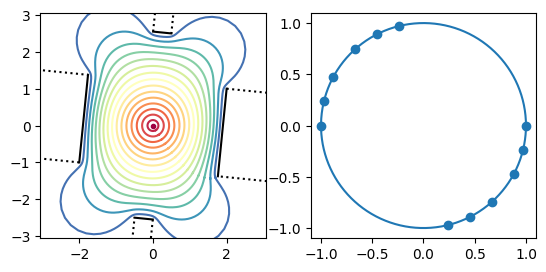

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0]
 * Zero: [0.2921955876086193, 0.07788707783145428, -2.0305851166139193]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [274]:
# works with ProblemIndices{1, 1}(1, [3], [3]) and ProblemIndices{1, 1}(4, [6], [6])
# not with ProblemIndices{1, 1}(3, [1], [3])
# that's one fixed point from each independent segment
poly = Polygon(
    SA[2+1im, Inf, 0.5+2.5im],
    DihedralSymmetry{2,0}(0.1+1im),
    Dict(1 => -0.5, 3 => -0.5),
)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{2, 3}(21, 22, [24, 26], [26, 27, 28])


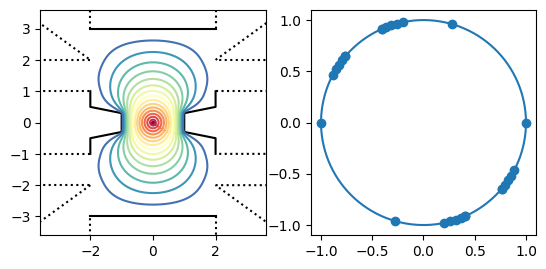

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 * Zero: [4.707834496359362, -2.476147873262639, -0.08768493036111343, 0.0006492613815376446, -0.27628778472028376, -1.9461685595380889, -0.9871724812367175]
 * Inf-norm of residuals: 0.000000
 * Iterations: 8
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 9
 * Jacobian Calls (df/dx): 8

In [275]:
poly = Polygon(
    SA[1+0.3im, 2+0.5im, 2+1im, Inf, 2+2im, Inf, 2+3im],
    DihedralSymmetry{2,0}(1im),
    Dict(3 => -0.5, 4 => 1, 5 => -0.8, 6=>1.3, 7 => -0.5),
)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 2}(12, 13, [15], [15, 16])


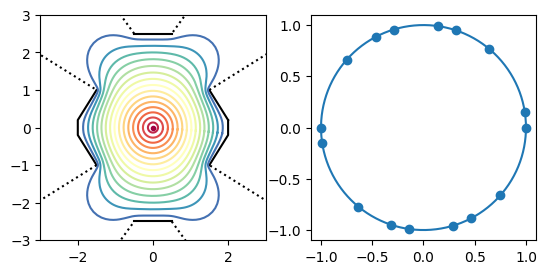

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0]
 * Zero: [0.8617063833936432, -0.6868986123320733, -0.6831699503517943, 1.5341653266180408]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [276]:
# works with ProblemIndices{1, 2}(1, [4   ], [1, 4]) 
# works with ProblemIndices{1, 2}(5, [7   ], [7, 8])
# works with ProblemIndices{2, 0}(1, [2, 4], [])
#   not with ProblemIndices{1, 2}(4, [1   ], [4, 1])
#   not with ProblemIndices{2, 0}(4, [5, 7], [])
poly = Polygon(
    SA[2+0.2im, 1.5+1im, Inf, 0.5+2.5im],
    DihedralSymmetry{2,0}(1im),
    Dict(2 => -0.5, 4 => -0.3),
)
# poly = circshift_poly(poly, 0)
# poly = remove_symmetry(poly)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 3}(15, 16, [19], [16, 19, 20])


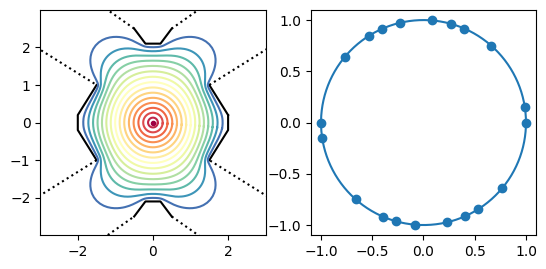

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0, 0.0]
 * Zero: [0.49456667851532093, 0.30193754775205556, -0.8125751031193228, -0.7911019903374624, 1.523875551036443]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [277]:
poly = Polygon(
    SA[2+0.2im, 1.5+1im, Inf, 0.5+2.5im, 0.2+2.1im],
    DihedralSymmetry{2,0}(1im),
    Dict(2 => -0.5, 4 => 0.1),
)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

#### P=1

idxs = SchwarzChristoffelDisk.ProblemIndices{0, 1}(4, 6, Int64[], [6])


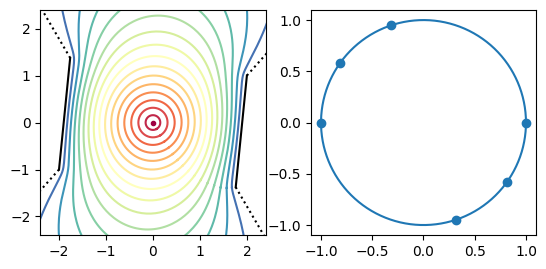

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0]
 * Zero: [-1.1152687333662803]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [278]:
# works with ProblemIndices{0,1}(1, 3, [], [3])
poly = Polygon(
    SA[2+1im, Inf],
    DihedralSymmetry{2,1}(0.1+1im),
    Dict(1 => -0.2),
)
# poly = remove_symmetry(poly)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{0, 2}(7, 2, Int64[], [9, 10])


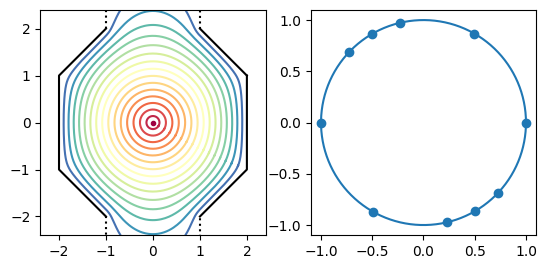

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0]
 * Zero: [-0.9589892519112747, -0.33094451763056065]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [279]:
# works with ProblemIndices{0,2}(2, 4, [], [4, 5])
poly = Polygon(
    SA[2+1im, 1+2im, Inf],
    DihedralSymmetry{2,1}(1im),
    Dict(2 => -0.25),
)
# poly = remove_symmetry(poly)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 0}(7, 8, [10], Int64[])


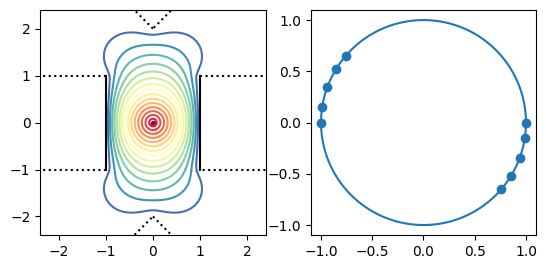

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0]
 * Zero: [0.2649898452428446, -2.7641832296550786]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [280]:
# ProblemIndices{1, 0}(2, 3, [5], Int64[])
poly = Polygon(
    SA[1+1im, Inf, 2im],
    DihedralSymmetry{2,1}(1im),
    Dict(1 => -0.5, 3=>-0.5),
)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 1}(10, 11, [13], [13])


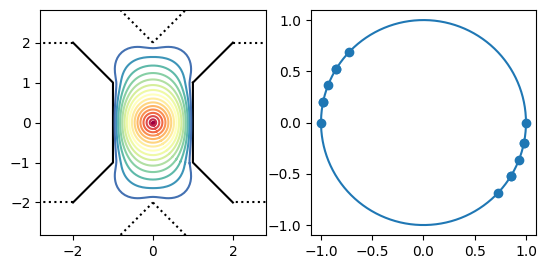

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0]
 * Zero: [3.6031189334976177, -3.7623894048739417, -2.475994569283218]
 * Inf-norm of residuals: 0.000000
 * Iterations: 8
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 9
 * Jacobian Calls (df/dx): 8

In [281]:
# ProblemIndices{1, 1}(3, 4, [6], [6])
poly = Polygon(
    SA[1+1im, 2+2im, Inf, 2im],
    DihedralSymmetry{2,1}(1im),
    Dict(2 => -0.25, 4=>-0.5),
)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 2}(13, 14, [17], [14, 17])


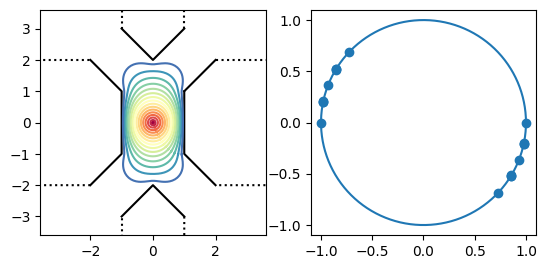

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0]
 * Zero: [3.3971845025023155, -0.007693714662969967, -3.5898059005775407, -2.474693838843335]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [282]:
# ProblemIndices{1, 2}(4, 5, [8], [5, 8])
poly = Polygon(
    SA[1+1im, 2+2im, Inf, 1+3im, 2im],
    DihedralSymmetry{2,1}(1im),
    Dict(2 => -0.25, 4=>-0.25),
)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 2}(13, 15, [17], [17, 18])


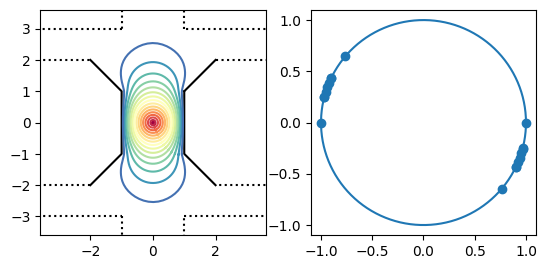

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0]
 * Zero: [0.007612602215473973, 2.006035110253928, -3.666905642559594, -2.2780814681148422]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [283]:
# ProblemIndices{1, 2}(4, 6, [8], [8, 9])
poly = Polygon(
    SA[1+1im, 2+2im, Inf, 1+3im, Inf],
    DihedralSymmetry{2,1}(1im),
    Dict(2 => -0.25, 3=>1, 4=>-0.5, 5=>1),
)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 3}(16, 18, [21], [18, 21, 22])


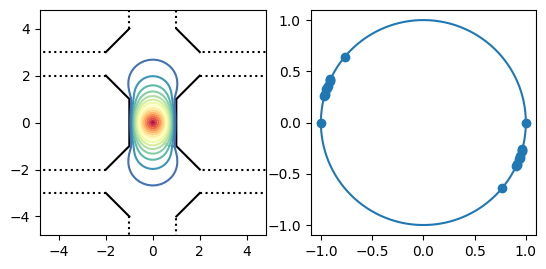

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0, 0.0]
 * Zero: [-1.115389410433965, 1.8195767712707767, -0.11494092309857958, -3.321765855677054, -2.2334426031872723]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [284]:
# ProblemIndices{1, 3}(5, 7, [10], [7, 10, 11])
poly = Polygon(
    SA[1+1im, 2+2im, Inf, 2+3im, 1+4im, Inf],
    DihedralSymmetry{2,1}(1im),
    Dict(2 => -0.25, 3=>1, 4=>-0.25, 5=>-0.25, 6=>1),
)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 1}(10, 12, [14], [14])


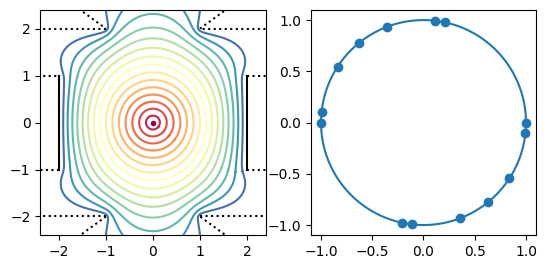

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0]
 * Zero: [-0.41638685137075065, 1.5338213522310877, -2.586518360409501]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [285]:
poly = Polygon(
    SA[2+1im, Inf, 1+2im, Inf],
    DihedralSymmetry{2,1}(1im),
    Dict(1 => -0.5, 2 => 1, 3 => -0.8),
)
# (fig, ax) = subplots()
# draw_polygon(poly, ax)
# poly = Polygon(poly.w, NoSymmetry(), poly.β, poly.ℓ)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{2, 1}(16, 17, [19, 22], [19])


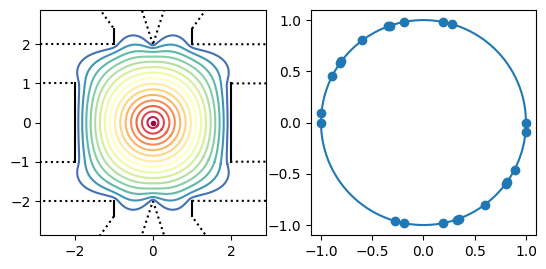

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0, 0.0]
 * Zero: [2.5321600169809115, -1.8003673506534195, -1.009203838582435, 1.4039500889077179, -2.615708567405703]
 * Inf-norm of residuals: 0.000000
 * Iterations: 8
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 9
 * Jacobian Calls (df/dx): 8

In [286]:
poly = Polygon(
    SA[2+1im, Inf, 1+2im, 1+2.4im, Inf, 2im],
    DihedralSymmetry{2,1}(1im),
    Dict(1 => -0.5, 2 => 1, 3 => -0.5, 4 => -0.2, 5=>1.1, 6 => -0.8),
)
# (fig, ax) = subplots()
# draw_polygon(poly, ax)
# poly = remove_symmetry(poly)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 2}(13, 15, [18], [15, 18])


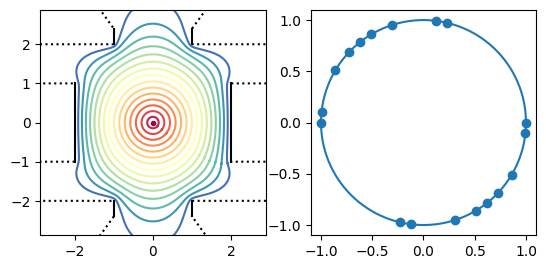

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0]
 * Zero: [-0.50156640790327, -0.6621879441616985, 1.4694886934166767, -2.5939566127858957]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [287]:
# works with ProblemIndices{2,1}(6, [9], [6, 9])
poly = Polygon(
    SA[2+1im, Inf, 1+2im, 1+2.4im, Inf],
    DihedralSymmetry{2,1}(1im),
    Dict(1 => -0.5, 2 => 1, 3 => -0.5, 4 => -0.2),
)
# (fig, ax) = subplots()
# draw_polygon(poly, ax)
# poly = remove_symmetry(poly)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 2}(13, 14, [18], [14, 15])


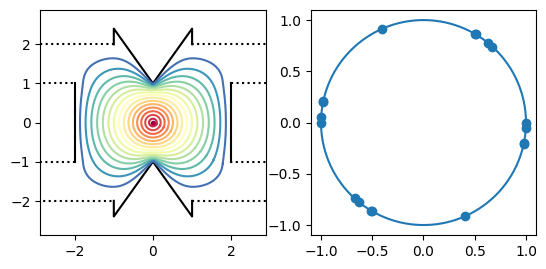

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0]
 * Zero: [4.504206327963523, -2.6612664796507985, 1.0528647808854183, -2.7743215314067013]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [288]:
poly = Polygon(
    SA[2+1im, Inf, 1+2im, 1+2.4im, 1im],
    DihedralSymmetry{2,1}(1im),
    Dict(1 => -0.5, 2 => 1),
)

res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 3}(16, 18, [21], [18, 21, 22])


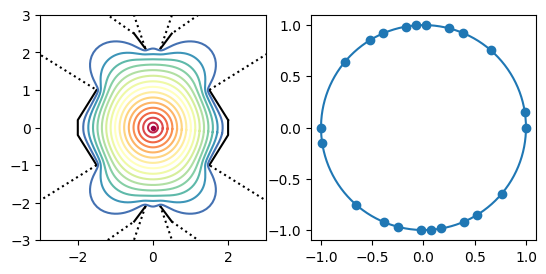

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0, 0.0]
 * Zero: [-0.8360577961364194, 0.4645024862153632, -0.7936576155100544, -0.7825734197846724, 1.5253058734432472]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [289]:
poly = Polygon(
    SA[2+0.2im, 1.5+1im, Inf, 0.5+2.5im, 0.2+2.1im, Inf],
    DihedralSymmetry{2,1}(1im),
    Dict(2 => -0.5, 3 => 1.0173595508115136, 4 => 0.1, 5 => -0.9, 6 => 1.209664, 7 => -0.9),
)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

#### P=2

idxs = SchwarzChristoffelDisk.ProblemIndices{0, 1}(6, 8, Int64[], [8])


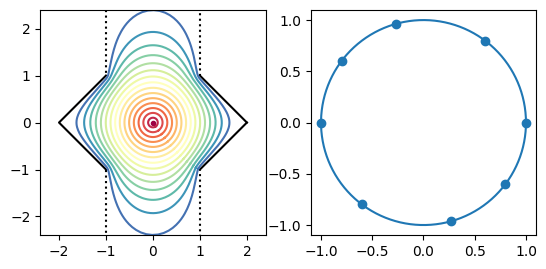

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0]
 * Zero: [-0.3550782548078416]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [290]:
poly = Polygon(SA[2, 1+1im, Inf], DihedralSymmetry{2,2}(1im), Dict(2 => -0.25))
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{0, 2}(9, 3, Int64[], [11, 12])


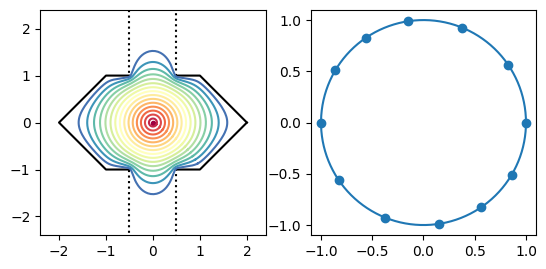

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0]
 * Zero: [-0.19999828238272957, -0.09982685208693994]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [291]:
poly = Polygon(SA[2, 1+1im, 0.5+1im, Inf], DihedralSymmetry{2,2}(1im), Dict(3 => -0.5))
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{0, 1}(6, 2, Int64[], [2])


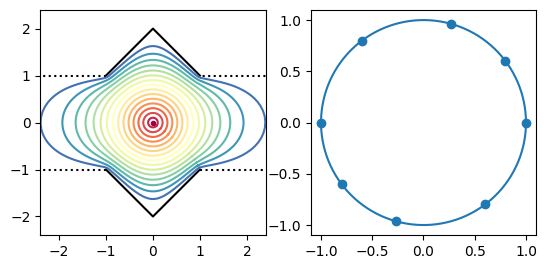

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0]
 * Zero: [0.35507825480784233]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [292]:
poly = Polygon(SA[Inf, 1+1im, 2im], DihedralSymmetry{2,2}(1im), Dict(2 => -0.25))
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{0, 2}(9, 10, Int64[], [10, 11])


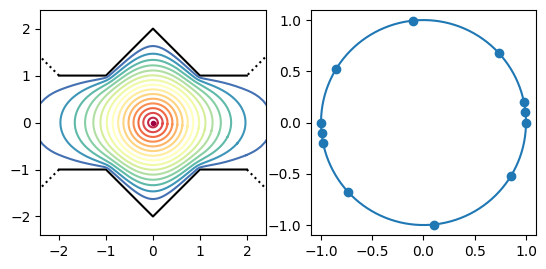

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0]
 * Zero: [0.5292077753386079, 1.687829260335739]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [293]:
poly = Polygon(SA[Inf, 2+1im, 1+1im, 2im], DihedralSymmetry{2,2}(1im), Dict(2 => -0.25))
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

poly.s = PolygonSymmetry{DihedralSymmetry{4, 1, ComplexF64}}(DihedralSymmetry{4, 1, ComplexF64}(0.0 + 0.9999999999999999im), 10)
idxs = SchwarzChristoffelDisk.ProblemIndices{0, 1}(9, 11, Int64[], [11])


┌ Warning: Overriding symmetry: DihedralSymmetry{4, 1, ComplexF64}(0.0 + 0.9999999999999999im)
└ @ SchwarzChristoffelDisk c:\Scratch\SchwarzChristoffelDisk.jl\src\polygon.jl:177


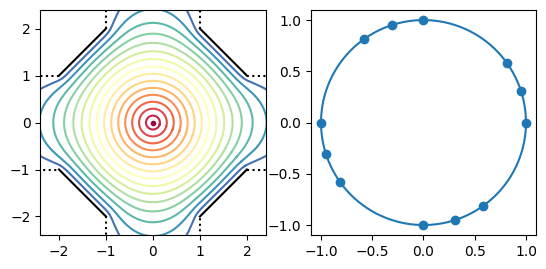

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0]
 * Zero: [-1.1203322966617406]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [302]:
# ProblemIndices{1, 0}(0, 2, [3], Int64[])
poly = Polygon(SA[Inf, 2+1im, 1+2im, Inf], DihedralSymmetry{2,2}(1im), Dict(1 => 1, 2 => -0.25, 3 => -0.25, 4 => 1))
@show poly.s
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{0, 1}(9, 11, Int64[], [11])


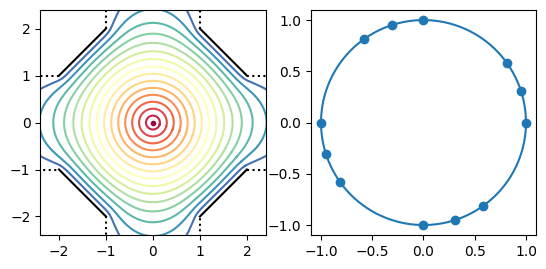

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0]
 * Zero: [-1.1203322966617424]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [321]:
poly = Polygon(SA[Inf, 2+1im], DihedralSymmetry{4,1}(1+1im), Dict(1 => 1, 2 => -0.25))
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 0}(9, 11, [12], Int64[])


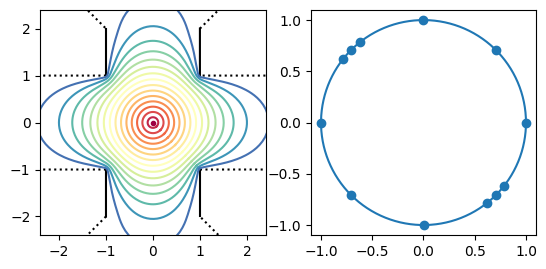

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0]
 * Zero: [-1.781504347872052, -0.15971945042477756]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [311]:
poly = Polygon(SA[Inf, 1+1im, 1+2im, Inf], DihedralSymmetry{2,2}(1im), Dict(1 => 1, 2 => -0.5, 3 => -0.25, 4 => 1.5))
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

In [ ]:
# Should fail with ArgumentError: Symmetry mismatch
# poly = Polygon(SA[Inf, 1+1im, 1+2im, Inf], DihedralSymmetry{2,2}(1im), Dict(1 => 1, 2 => -0.25, 3 => -0.25, 4 => 1))
# res, scderiv = sc_parameter_problem(poly)
# sc_plot(scderiv, 15, 500, "Spectral", false)
# res

LoadError: ArgumentError: Symmetry mismatch; inferred DihedralSymmetry{4, 1, ComplexF64}(0.0 + 0.9999999999999999im) from β and ℓ

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 1}(12, 14, [15], [15])


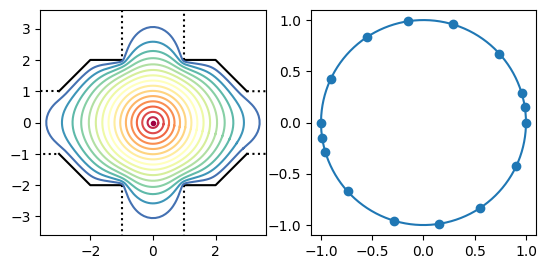

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0]
 * Zero: [-0.2031604377471445, 0.20649680398062953, 1.0903303529068178]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [ ]:
# ProblemIndices{1,1}(0, 2, [3], [3])
poly = Polygon(SA[Inf, 3+1im, 2+2im, 1+2im, Inf], DihedralSymmetry{2,2}(1im), Dict(1 => 1, 2 => -0.25, 4 => -0.5, 5 => 1))
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 1}(12, 14, [1], [14])


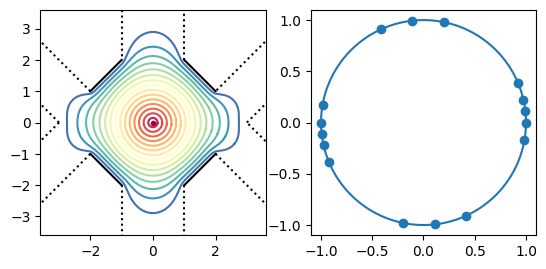

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0]
 * Zero: [-1.1426606239844277, 1.7290498435694739, 0.4371693995463713]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [ ]:
# ProblemIndices{1,1}(0, 1, [3], [3])
poly = Polygon(SA[3, Inf, 2+1im, 1+2im, Inf], DihedralSymmetry{2,2}(1im), Dict(1 => -0.5, 2=> 1, 3=>-0.5, 4=>-0.25, 5=>1))
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 2}(15, 17, [1], [17, 18])


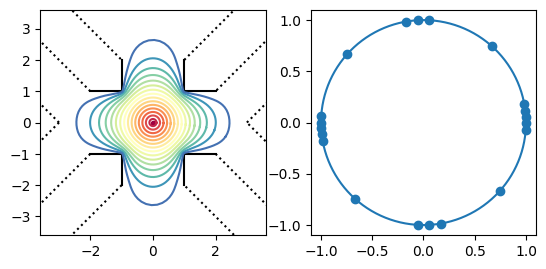

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0]
 * Zero: [-1.7816289610885463, 0.01205262559743913, 2.2721568365806757, 0.21567040733543827]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [ ]:
# ProblemIndices{1, 2}(0, 1, [3], [3, 4])
poly = Polygon(SA[3, Inf, 2+1im, 1+1im, 1+2im, Inf], DihedralSymmetry{2,2}(1im), Dict(1 => -0.5, 2=> 1, 3=>-0.25, 5=>-0.25, 6=>1.5))
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 1}(12, 14, [16], [16])


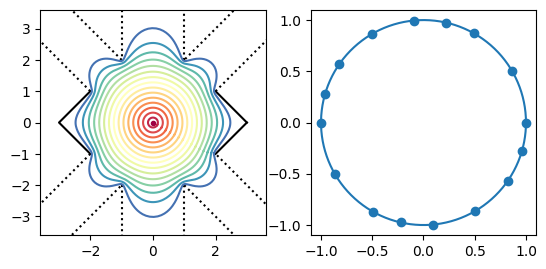

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0]
 * Zero: [0.3108234420315769, 0.11287113058236428, -0.6180586983128146]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [ ]:
# ProblemIndices{1, 1}(0, 1, [4], [1])
poly = Polygon(SA[3, 2+1im, Inf, 1+2im, Inf], DihedralSymmetry{2,2}(1im), Dict(2 =>-0.5, 3=>1,4=>-0.75, 5=>1))
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

In [ ]:
poly = Polygon(
    SA[2, 1.5+1im, Inf, 0.5+2.5im, 0.2+2im, Inf],
    DihedralSymmetry{2,2}(1im),
    Dict(2 => -0.5, 3 => 1.0173595508115136, 4 => 0.1, 5 => -0.9, 6 => 1.270113663, 7 => -0.9),
)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 2}(15, 17, [20], [17, 20])


LoadError: parameter_problem failed although nlsolve converged

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 2}(15, 17, [20], [17, 20])


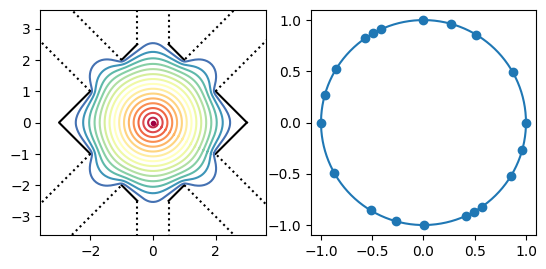

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0]
 * Zero: [-1.5247955105425643, 0.43163425927850113, 0.001781477910943519, -0.63674996147508]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [ ]:
# ProblemIndices{1, 2}(0, 1, [4], [1, 4])
poly = Polygon(
    SA[3, 2+1im, Inf, 1+2im, 0.5+2.5im, Inf],
    DihedralSymmetry{2,2}(1im),
    Dict(2 =>-0.5, 3=>1, 4=>-0.5, 5=>-0.25, 6=>1))
# poly = remove_symmetry(poly)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 2}(15, 17, [19], [19, 20])


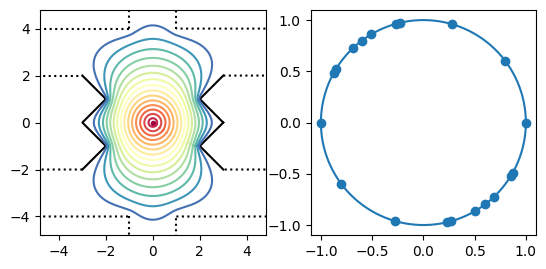

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0]
 * Zero: [-0.8202305269088817, 1.7515504411886893, -2.4303152341648455, -0.23602457766080362]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [ ]:
# ProblemIndices{1, 2}(0, 1, [5], [1, 2])
poly = Polygon(
    SA[3, 2+1im, 3+2im, Inf, 1+4im, Inf],
    DihedralSymmetry{2,2}(1im),
    Dict(3 => -0.25, 4=>1, 5=>-0.5, 6=>1),
)
# poly = Polygon(poly.w, NoSymmetry(), poly.β, poly.ℓ)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 3}(18, 20, [23], [20, 23, 24])


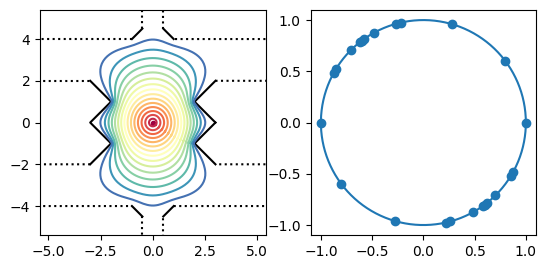

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0, 0.0]
 * Zero: [-1.5028486671584012, -0.7729694854374268, 1.6940373637244421, -2.437678393145929, -0.23931898602424775]
 * Inf-norm of residuals: 0.000000
 * Iterations: 7
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 8
 * Jacobian Calls (df/dx): 8

In [ ]:
# ProblemIndices{1, 2}(0, 1, [5], [1, 2, 5])
poly = Polygon(
    SA[3, 2+1im, 3+2im, Inf, 1+4im, 0.5+4.5im, Inf],
    DihedralSymmetry{2,2}(1im),
    Dict(3 => -0.25, 4=>1, 5=>-0.25, 6=>-0.25, 7=>1),
)
# poly = remove_symmetry(poly)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 1}(12, 13, [16], [13])


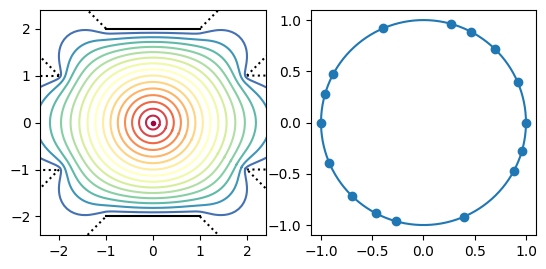

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0]
 * Zero: [1.1730822973077588, -0.30401192891000745, -0.35086513395855046]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [ ]:
# ProblemIndices{1, 1}(0, 2, [4], [4])
poly = Polygon(
    SA[Inf, 2+1im, Inf, 1+2im, 2im],
    DihedralSymmetry{2,2}(1im),
    Dict(1 => 1, 2=>-0.75, 3=>1, 4=>-0.25),
)
# poly = remove_symmetry(poly)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 2}(15, 16, [20], [16, 17])


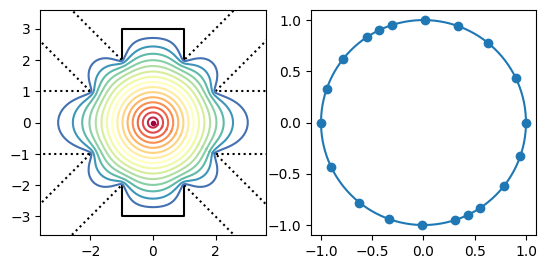

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0]
 * Zero: [-0.8633448684197518, -0.022236629044853018, -0.007723576170943454, -0.2958691508910952]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [ ]:
# ProblemIndices{1, 2}(0, 2, [4], [4, 5])
poly = Polygon(
    SA[Inf, 2+1im, Inf, 1+2im, 1+3im, 3im],
    DihedralSymmetry{2,2}(1im),
    Dict(1 => 1, 2=>-0.75, 3=>1, 4=>-0.75),
)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 1}(12, 13, [15], [15])


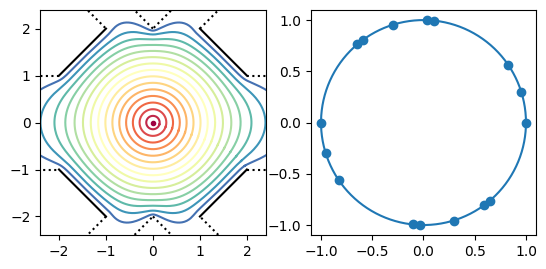

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0]
 * Zero: [1.6041651892706743, -2.548736069475265, 1.0673275232159503]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [ ]:
# ProblemIndices{1, 1}(0, 2, [5], [2])
poly = Polygon(
    SA[Inf, 2+1im, 1+2im, Inf, 2im],
    DihedralSymmetry{2,2}(1im),
    Dict(1 => 1, 2=>-0.25, 3=>-0.5, 4=>1, 5=>-0.5),
)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 2}(15, 16, [19], [16, 19])


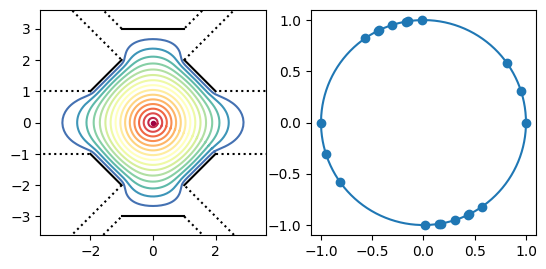

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0]
 * Zero: [2.5402556105168155, -2.5226685083428984, -1.9338051908624743, 1.1369832332278487]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [ ]:
# ProblemIndices{1, 1}(0, 2, [5], [2, 5])
poly = Polygon(
    SA[Inf, 2+1im, 1+2im, Inf, 1+3im, 3im],
    DihedralSymmetry{2,2}(1im),
    Dict(1 => 1, 2=>-0.25, 3=>-0.5, 4=>1, 5=>-0.25),
)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{2, 0}(15, 17, [20, 18], Int64[])


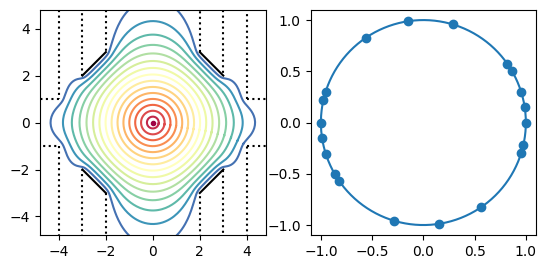

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0]
 * Zero: [-0.41748486967861864, 2.1043447923323773, -0.9973820213876717, 0.36762860641216455]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [ ]:
# ProblemIndices{2,0}(0, 2, [4, 5], [])
poly = Polygon(
    SA[Inf, 4+1im, Inf, 3+2im, 2+3im, Inf],
    DihedralSymmetry{2,2}(1im),
    Dict(1 => 1, 2=>-0.5, 3=> 1, 4=>-0.75, 5=>-0.25, 6=>1),
)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{2, 1}(18, 20, [24, 21], [21])


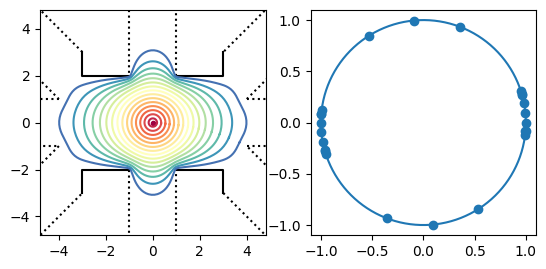

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0, 0.0]
 * Zero: [-0.6563526086955715, 3.1895990720004175, 1.6004404008232136, -2.3657550984918756, -0.2010808283736912]
 * Inf-norm of residuals: 0.000000
 * Iterations: 7
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 8
 * Jacobian Calls (df/dx): 8

In [ ]:
# ProblemIndices{2, 1}(0, 2, [4, 5], [5])
poly = Polygon(
    SA[Inf, 4+1im, Inf, 3+3im, 3+2im, 1+2im, Inf],
    DihedralSymmetry{2,2}(1im),
    Dict(1 => 1, 2=>-0.75, 3=> 1, 4=>0.25, 6=>-0.5, 7=>1),
)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{2, 0}(15, 17, [19, 20], Int64[])


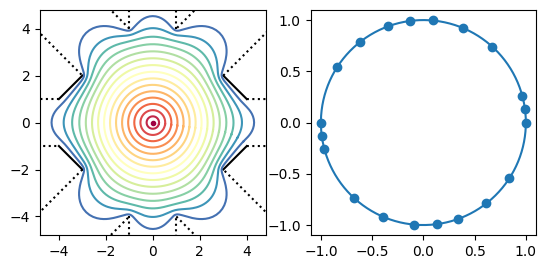

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0]
 * Zero: [-0.3475788220418267, -0.07502626708535988, -0.5355727041035351, 1.4891581076747402]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [ ]:
# ProblemIndices{2, 0}(0, 2, [3, 5], Int64[])
poly = Polygon(
    SA[Inf, 4+1im, 3+2im, Inf, 1+4im, Inf],
    DihedralSymmetry{2,2}(1im),
    Dict(1 => 1, 2=>-0.25, 3=>-0.5, 4=>1, 5=>-0.75, 6=>1),
)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

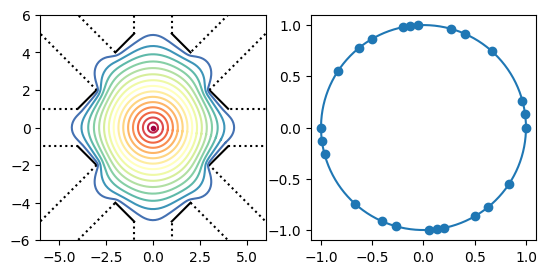

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0, 0.0]
 * Zero: [-1.4736466186537893, 0.8067694823580742, -0.7618692321999941, -0.6222224187061495, 1.4899621905465448]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [348]:
# ProblemIndices{2, 1}(0, 2, [3, 5], [5])
# This polygon is genuinely {2,2}, but the classifier thinks it's {4,2}.
# it seems that using the same my_inf number to replace edge lengths at infinities
# makes it seem symmetric in that regard.
# not SchwarzChristoffelDisk.ProblemIndices{1, 0}(21, 23, [24], Int64[]) with {4,2}
poly = Polygon(
    SA[Inf, 4+1im, 3+2im, Inf, 2+4im, 1+5im, Inf],
    DihedralSymmetry{2,2}(1im),
    Dict(1 => 1, 2=>-0.25, 3=>-0.5, 4=>1, 5=>-0.5, 6=>-0.25, 7=>1),
)
poly = circshift_poly(poly, 0)
# poly = remove_symmetry(poly)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{2, 1}(18, 20, [22, 23], [23])


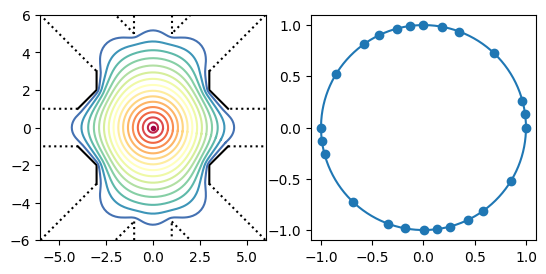

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0, 0.0]
 * Zero: [-0.34184020060732045, 0.057705985016016766, -0.8291665389840671, -0.3292449656420492, 1.4402976374583571]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [ ]:
# ProblemIndices{2,1}(0, 2, [3, 6], [3])
poly = Polygon(
    SA[Inf, 4+1im, 3+2im, 3+3im, Inf, 1+5im, Inf],
    DihedralSymmetry{2,2}(1im),
    Dict(1 => 1, 2=>-0.25, 4=>-0.25, 5=>1, 6=>-0.75, 7=>1),
)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{2, 2}(21, 23, [26, 24], [26, 27])


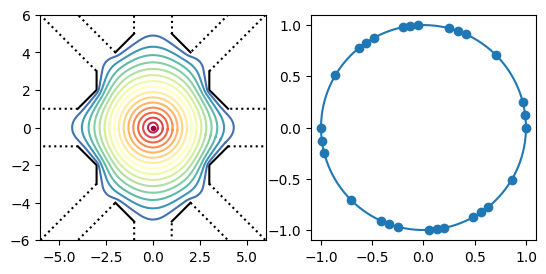

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 * Zero: [-1.445370056728365, 1.1258718407319694, 0.19563655932744398, -1.4775813324218117, -0.40830203262803094, 1.4319297552508345]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [ ]:
# ProblemIndices{2,1}(0, 2, [3, 6], [3, 6])
poly = Polygon(
    SA[Inf, 4+1im, 3+2im, 3+3im, Inf, 2+4im, 1+5im, Inf],
    DihedralSymmetry{2,2}(1im),
    Dict(1 => 1, 2=>-0.25, 4=>-0.25, 5=>1, 6=>-0.5, 7=>-0.25, 8=>1),
)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 0}(9, 11, [1], Int64[])


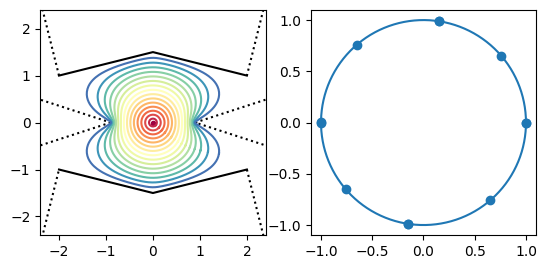

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0]
 * Zero: [5.5073417560668325, -5.314143014435223]
 * Inf-norm of residuals: 0.000000
 * Iterations: 8
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 9
 * Jacobian Calls (df/dx): 9

In [ ]:
# ProblemIndices{2,1}(0, 1, [3], [])
poly = Polygon(
    SA[0.9, Inf, 2+1im, 1.5im],
    DihedralSymmetry{2,2}(1im),
    Dict(1=>-0.8, 3=>-0.5),
)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 1}(12, 15, [1], [13])


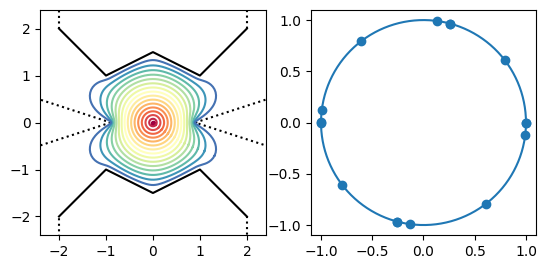

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0]
 * Zero: [1.862514233309086, 4.285774481087807, -5.958750096976004]
 * Inf-norm of residuals: 0.000000
 * Iterations: 10
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 11
 * Jacobian Calls (df/dx): 10

In [ ]:
# ProblemIndices{2,1}(0, 1, [3], [3])
poly = Polygon(
    SA[0.9, Inf, 2+2im, 1+1im, 1.5im],
    DihedralSymmetry{2,2}(1im),
    Dict(1=>-0.8, 3=>-0.25),
)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 0}(9, 10, [12], Int64[])


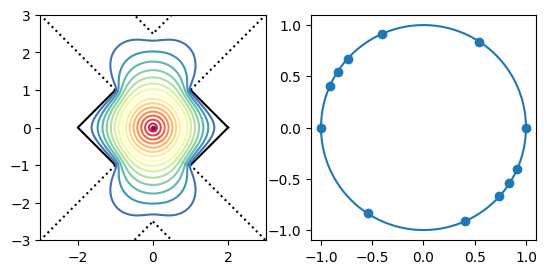

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0]
 * Zero: [-0.9713866743616023, -0.8646067362151038]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [ ]:
# ProblemIndices{1, 0}(0, 2, [4], [])
poly = Polygon(
    SA[2, 1+1im, Inf, 2.5im],
    DihedralSymmetry{2,2}(1im),
    Dict(2=>-0.5, 4=>-0.5),
)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 1}(12, 13, [16], [13])


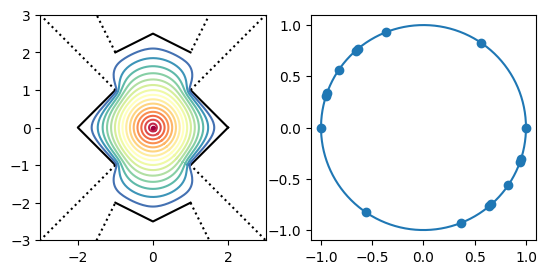

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0]
 * Zero: [2.0877712679001554, -2.313701015103376, -1.1293555558775534]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [ ]:
# ProblemIndices{1, 1}(0, 2, [4], [1])
# ProblemIndices{1, 1}(0, 2, [4], [4])
poly = Polygon(
    SA[2, 1+1im, Inf, 1+2im, 2.5im],
    DihedralSymmetry{2,2}(1im),
    Dict(2=>-0.5, 4=>-0.5),
)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 1}(12, 13, [15], [15])


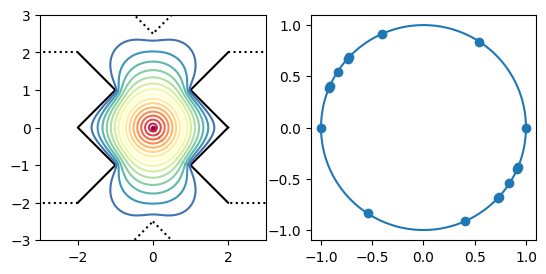

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0]
 * Zero: [2.388552473724404, -3.291673549377034, -0.9101034011863488]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [ ]:
# ProblemIndices{1, 1}(0, 2, [5], [2])
poly = Polygon(
    SA[2, 1+1im, 2+2im, Inf, 2.5im],
    DihedralSymmetry{2,2}(1im),
    Dict(3=>-0.25, 5=>-0.5),
)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 2}(15, 16, [19], [16, 19])


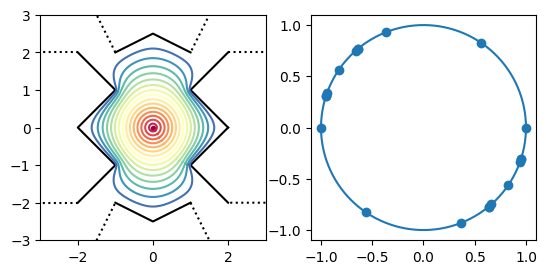

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0]
 * Zero: [2.0789767729137827, 3.244998880152185, -5.545106632948642, -1.1341415901423744]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [ ]:
# ProblemIndices{1, 2}(0, 2, [5], [2,5])
poly = Polygon(
    SA[2, 1+1im, 2+2im, Inf, 1+2im, 2.5im],
    DihedralSymmetry{2,2}(1im),
    Dict(3=>-0.25, 5=>-0.5),
)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 2}(15, 16, [19], [16, 19])


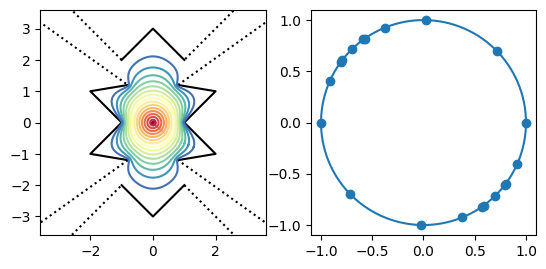

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0]
 * Zero: [2.196215599352102, -2.609604218963861, -0.6403491364437146, -0.6132707235118703]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [ ]:
poly = Polygon(
    SA[1, 2+1im, 0.8+1.2im, Inf, 1+2im, 3im],
    DihedralSymmetry{2,2}(1im),
    Dict(3 => -0.75, 5 => -0.5),
)
poly = circshift_poly(poly, 0)
# poly = remove_symmetry(poly)

res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res


idxs = SchwarzChristoffelDisk.ProblemIndices{1, 0}(9, 11, [12], Int64[])


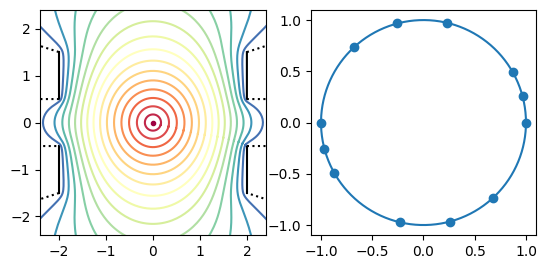

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0]
 * Zero: [-0.5334909574637428, 1.1645715115954651]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [ ]:
# ProblemIndices{1,0}(0, 2, [3], [])

poly = Polygon(
    SA[Inf, 2+0.5im, 2+1.5im, Inf],
    DihedralSymmetry{2,2}(2im),
    Dict(1 => 1, 2 => -0.5, 3=>-0.4)
)
poly = circshift_poly(poly, 0)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res


idxs = SchwarzChristoffelDisk.ProblemIndices{0, 1}(6, 8, Int64[], [8])


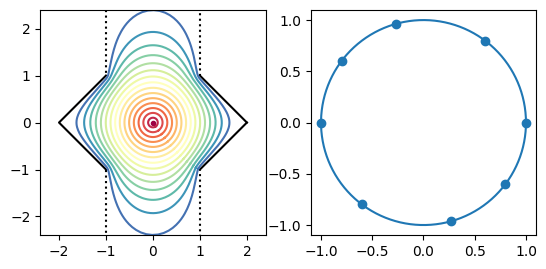

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0]
 * Zero: [-0.3550782548078416]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [ ]:
# ProblemIndices{0, 1}(0, 2, Int64[], [4])

poly = Polygon(
    SA[2, 1+1im, Inf],
    DihedralSymmetry{2,2}(2im),
    Dict(2 => -0.25)
)
poly = circshift_poly(poly, 0)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res


idxs = SchwarzChristoffelDisk.ProblemIndices{1, 0}(9, 10, [12], Int64[])


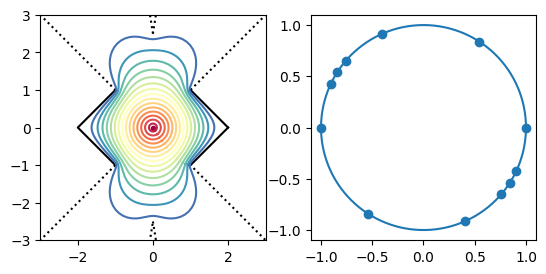

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0]
 * Zero: [-1.1990980626995786, -0.8137352396907714]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [ ]:
# works with ProblemIndices{1, 0}(0, 2, [4], Int64[])

poly = Polygon(
    SA[2, 1+1im, Inf, 2.5im],
    DihedralSymmetry{2,2}(1im),
    Dict(2 => -0.5, 4 => -0.9),
)
# poly = circshift_poly(poly, 0)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{2, 1}(18, 19, [22, 24], [19])


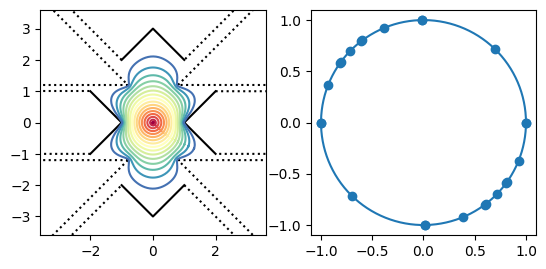

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0, 0.0]
 * Zero: [2.4422088122155796, -2.9767882287141987, -0.44677105240062015, 7.08755089666455, -7.826497602956117]
 * Inf-norm of residuals: 0.000000
 * Iterations: 7
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 8
 * Jacobian Calls (df/dx): 8

In [ ]:
poly = Polygon(
    SA[1, 2+1im, Inf, 0.8+1.2im, Inf, 1+2im, 3im],
    DihedralSymmetry{2,2}(1im),
    Dict(2 => -0.25, 3 => 1, 4 => -0.75, 5 => 1, 6 => -0.5),
)
poly = circshift_poly(poly, 0)
# poly = remove_symmetry(poly)

res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res


## Others

poly.s = PolygonSymmetry{DihedralSymmetry{2, 1, ComplexF64}}(DihedralSymmetry{2, 1, ComplexF64}(0.979877351517712 - 0.19960054103792968im), 18)
idxs = SchwarzChristoffelDisk.ProblemIndices{0, 4}(17, 18, Int64[], [18, 1, 2, 3])


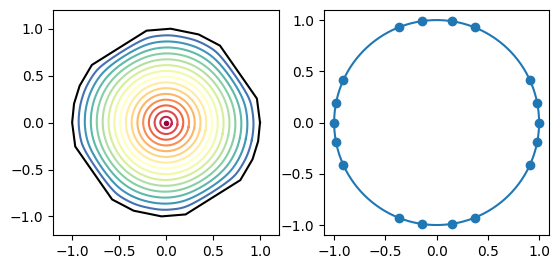

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0]
 * Zero: [-0.2122374343716142, -1.1788928076722451, 1.191928628242659, -0.23752483814932385]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [271]:
vertices = cispi.(SchwarzChristoffelDisk.y_to_θ([-1, 1, -1/6, 1/6, -1, 1, 1/4, 0, -1/4, -1, 1, -1/6, 1/6, -1, 1, 1/4, 0]))
vertices = circshift(vertices, 1)
poly = Polygon(SVector{length(vertices)}(vertices))
@show poly.s
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

In [185]:
SchwarzChristoffelDisk.circshift_noalloc_poplast(
    SchwarzChristoffelDisk.prevertex_params(MVector{4}(1:4), poly.s), 3)

17-element MVector{17, Int64} with indices SOneTo(17):
 -3
 -2
 -1
  1
  2
  3
  4
  0
 -4
 -3
 -2
 -1
  1
  2
  3
  4
  0

poly.s = DihedralSymmetry{2, 1, ComplexF64}(0.9716094717627946 - 0.23659043594537654im)


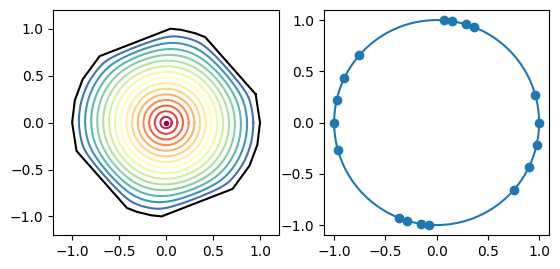

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0]
 * Zero: [-0.20306573751029164, -1.218220111500896, 2.3820482515243024, -0.45609273867074174]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [ ]:
vertices = cispi.(SchwarzChristoffelDisk.y_to_θ([-1, 2, -1/3, 1/3, -2, 1, 1/4, 0, -1/4, -1, 2, -1/3, 1/3, -2, 1, 1/4, 0]))
poly = Polygon(SVector{length(vertices)}(vertices))
@show poly.s
# poly = Polygon(poly.w, BilateralSymmetry{1}(poly.s.axis), poly.β, poly.ℓ)
# poly = remove_symmetry(poly)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

poly.s = BilateralSymmetry{0, ComplexF64}(0.914451556131548 - 0.4046953811060738im)


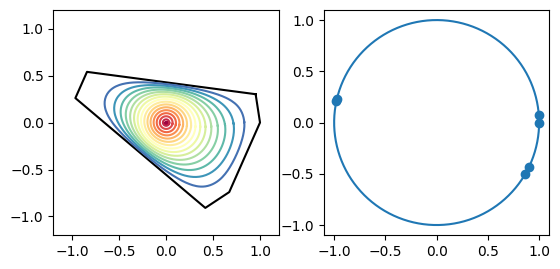

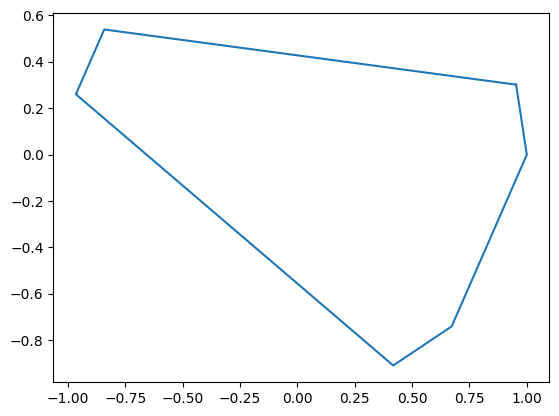

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0]
 * Zero: [-4.741710003746189, 3.609751426747255, -1.7601752018391572]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [72]:
vertices = cispi.(SchwarzChristoffelDisk.y_to_θ([-2, 2, -2, 2, -1]))
poly = Polygon(SVector{length(vertices)}(vertices))
@show poly.s
fig, ax = subplots()
draw_polygon(poly, ax)

res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{2, 1}(1, [2, 4], [4])


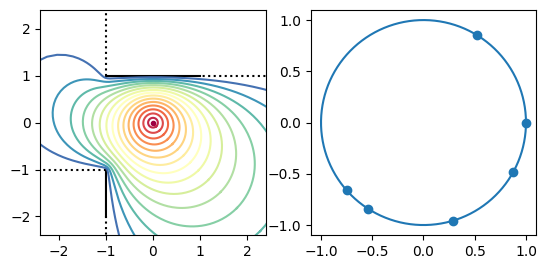

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0, 0.0]
 * Zero: [-1.0273843373311995, 2.3284311330158762, -1.1358150278190327, 0.11624541197971766, 0.41412452799801164]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [ ]:
poly = Polygon(SA[1+1im, -1+1im, -Inf, -(1+1im), -1-2im, Inf],
               Dict(1:5 .=> [0, -0.5, 1.5, -0.5, 0]))
# poly = remove_symmetry(poly)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

poly.s = BilateralSymmetry{2, Complex{Int64}}(-2 + 0im)


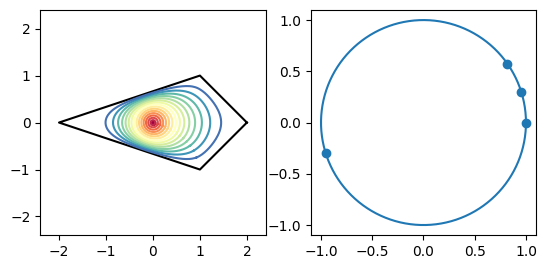

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0]
 * Zero: [-2.2250495031993265]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [463]:
poly = Polygon(SA[2, 1+1im, -2, 1-1im])
@show poly.s
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500)
res

poly.s = DihedralSymmetry{3, 0, ComplexF64}(2.0 + 0.0im)
idxs = SchwarzChristoffelDisk.ProblemIndices{0, 1}(0, 1, Int64[], [1])


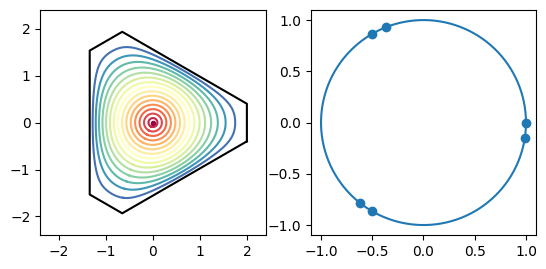

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0]
 * Zero: [2.561059862485169]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [ ]:
poly = Polygon(SA[2-0.4im], DihedralSymmetry{3,0}(2.0+0im))
# poly_nosym = remove_symmetry(poly)
@show poly.s
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500)
res